<a href="https://colab.research.google.com/github/muhaseeb34/Data3001-Modelling-2/blob/main/DecisionTreeGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data_product.csv to final_data_product.csv


In [3]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_csv("final_data_product.csv")
print("Original data shape:", df.shape)
df

Original data shape: (1032, 255)


lap_id  invalid_lap  BPS_SPEED  BPS_THROTTLE  \
0      10021698834789871149_1            1      316.0      1.000000   
1     10021698834789871149_10            1      324.0      0.970802   
2     10021698834789871149_11            1      322.0      1.000000   
3     10021698834789871149_12            0      322.0      0.025177   
4     10021698834789871149_13            1      324.0      1.000000   
...                       ...          ...        ...           ...   
1027    9874269645241895165_2            1      144.0      0.000000   
1028    9941972541231747669_1            1      324.0      1.000000   
1029    9941972541231747669_2            0      324.0      1.000000   
1030    9948558370850722411_1            1      324.0      1.000000   
1031    9948558370850722411_2            1      322.0      1.000000   

      BPS_STEER  BPS_BRAKE  BPS_CURRENTLAPTIMEINMS  BPS_LAPDISTANCE  \
0      0.074568        0.0                  2615.0            223.0   
1      0.000464        0.0                  3097.0            273.0   
2     -0.002375        0.0                  2976.0            258.0   
3      0.006011        0.0                  3049.0            269.0   
4      0.021114        0.0                  3046.0            268.0   
...         ...        ...                     ...              ...   
1027  -0.525250        0.0                  6234.0            450.0   
1028   0.000000        0.0                  2979.0            263.0   
1029  -0.000000        0.0                  3014.0            264.0   
1030  -0.003344        0.0                  3149.0            276.0   
1031   0.001372        0.0                  3143.0            273.0   

      BPS_WORLDPOSITIONX  BPS_WORLDPOSITIONY  ...  dist_530_YAW  \
0             274.071987          313.458779  ...     -2.715189   
1             310.096901          278.846172  ...     -2.677639   
2             298.743940          288.688005  ...     -2.672484   
3             307.165908          281.569461  ...     -2.683784   
4             306.397540          282.215448  ...     -2.576070   
...                  ...                 ...  ...           ...   
1027          369.369267          134.915112  ...     -2.670881   
1028          302.615240          285.497492  ...     -2.689289   
1029          303.184481          284.646456  ...     -2.691542   
1030          301.987594          286.287858  ...     -2.532977   
1031          303.777372          285.262723  ...     -3.075689   

      dist_530_PITCH  dist_530_ROLL  dist_530_left_dist  dist_530_right_dist  \
0           0.000475      -0.016953            1.741342            10.851370   
1          -0.002429      -0.010994            5.229576             7.362893   
2          -0.003209      -0.015086            4.491344             8.101110   
3          -0.003549      -0.013458            4.000375             8.592165   
4           0.002121      -0.016932            5.969796             6.622633   
...              ...            ...                 ...                  ...   
1027        0.003020      -0.000062            0.781471            11.886334   
1028       -0.003212      -0.016119            2.482649            10.109993   
1029       -0.003572      -0.011709            3.187732             9.404851   
1030        0.004081      -0.015205            1.779133            10.876460   
1031       -0.004278      -0.012298            0.939035            13.575785   

      dist_530_dist_apex_1  dist_530_dist_apex_2  dist_530_angle_to_apex1  \
0               132.666175             33.599712              -177.333510   
1               134.315712             34.235318              -178.276773   
2               133.962370             34.073817              -177.906287   
3               133.726732             33.972230              -177.665140   
4               134.674490             34.413890              -179.086529   
...                    ...                   ...                      ...   
1027        

In [5]:
# new section with new change suggestions
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist", "BPS_CURRENTLAPTIMEINMS",
    "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS", "STS_CURRENTLAPTIMEINMS",
    "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS", "APX2_CURRENTLAPTIMEINMS"
    # added all the currentlaptimeinms for each moment as well since thats not controlled by driver - Muhammad
]

data = df.drop(columns=DROPPED).dropna().drop_duplicates()
data = data[data['Target_CURRENTLAPTIMEINMS'] < 60000]
X = data.drop(columns=["lap_id","invalid_lap", "Target_CURRENTLAPTIMEINMS"])
y = data["Target_CURRENTLAPTIMEINMS"]

# === YOUR COLUMN SELECTION LOGIC ===
target_columns = [
    'Target_CURRENTLAPTIMEINMS', '_LAPDISTANCE', '_WORLDPOSITIONX',
    '_WORLDPOSITIONY', '_STEER', '_BRAKE', '_SPEED', '_THROTTLE'
]

selected_columns = [col for col in X.columns if col.endswith(tuple(target_columns))]

X = X[selected_columns]

print(f"After cleaning and column selection:")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Target range: {y.min():.0f} to {y.max():.0f} ms")
print(f"Average lap time: {y.mean():.0f} ms")
print(f"\nSelected columns count: {len(selected_columns)}")
print(f"First 10 selected columns: {selected_columns[:10]}")


After cleaning and column selection:
Features: 69, Samples: 825
Target range: 12096 to 57223 ms
Average lap time: 14566 ms

Selected columns count: 69
First 10 selected columns: ['BPS_SPEED', 'BPS_THROTTLE', 'BPS_STEER', 'BPS_BRAKE', 'BPS_LAPDISTANCE', 'BPS_WORLDPOSITIONX', 'BPS_WORLDPOSITIONY', 'BPS_ext_LAPDISTANCE', 'BPE_SPEED', 'BPE_THROTTLE']


In [6]:
for c in X.columns:
  print(c)

BPS_SPEED
BPS_THROTTLE
BPS_STEER
BPS_BRAKE
BPS_LAPDISTANCE
BPS_WORLDPOSITIONX
BPS_WORLDPOSITIONY
BPS_ext_LAPDISTANCE
BPE_SPEED
BPE_THROTTLE
BPE_STEER
BPE_BRAKE
BPE_LAPDISTANCE
BPE_WORLDPOSITIONX
BPE_WORLDPOSITIONY
BPE_ext_LAPDISTANCE
THS_SPEED
THS_THROTTLE
THS_STEER
THS_BRAKE
THS_LAPDISTANCE
THS_WORLDPOSITIONX
THS_WORLDPOSITIONY
THS_ext_LAPDISTANCE
THE_SPEED
THE_THROTTLE
THE_STEER
THE_BRAKE
THE_LAPDISTANCE
THE_WORLDPOSITIONX
THE_WORLDPOSITIONY
THE_ext_LAPDISTANCE
STS_SPEED
STS_THROTTLE
STS_STEER
STS_BRAKE
STS_LAPDISTANCE
STS_WORLDPOSITIONX
STS_WORLDPOSITIONY
STS_ext_LAPDISTANCE
STM_SPEED
STM_THROTTLE
STM_STEER
STM_BRAKE
STM_LAPDISTANCE
STM_WORLDPOSITIONX
STM_WORLDPOSITIONY
STE_SPEED
STE_THROTTLE
STE_STEER
STE_BRAKE
STE_LAPDISTANCE
STE_WORLDPOSITIONX
STE_WORLDPOSITIONY
STE_ext_LAPDISTANCE
APX1_SPEED
APX1_THROTTLE
APX1_STEER
APX1_BRAKE
APX1_LAPDISTANCE
APX1_WORLDPOSITIONX
APX1_WORLDPOSITIONY
APX2_SPEED
APX2_THROTTLE
APX2_STEER
APX2_BRAKE
APX2_LAPDISTANCE
APX2_WORLDPOSITIONX
APX2_WORLDPOS

In [7]:
# === CLEAN DATA ===
data = df.drop(columns=DROPPED, errors='ignore').dropna().drop_duplicates()
data = data[data['invalid_lap'] == 0]  # Keep only valid laps
data = data[data['Target_CURRENTLAPTIMEINMS'] < 60000]  # Reasonable lap times

# === PREPARE FEATURES & TARGET ===
X = data.drop(columns=['lap_id', 'invalid_lap', 'Target_CURRENTLAPTIMEINMS'])
y = data['Target_CURRENTLAPTIMEINMS']

print(f"After cleaning: {X.shape[1]} features, {X.shape[0]} samples")
print(f"Target range: {y.min():.0f} to {y.max():.0f} ms")
print(f"Average lap time: {y.mean():.0f} ms")

After cleaning: 174 features, 313 samples
Target range: 12204 to 57223 ms
Average lap time: 13428 ms


In [8]:
# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === ORIGINAL TREE ===
print("=== TRAINING ORIGINAL TREE ===")
dt_original = DecisionTreeRegressor(
    max_depth=5,
    random_state=42,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_original.fit(X_train, y_train)

=== TRAINING ORIGINAL TREE ===


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [9]:
# === ORIGINAL TREE ===
print("\n=== TRAINING ORIGINAL TREE ===")
dt_original = DecisionTreeRegressor(
    max_depth=5,
    random_state=42,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_original.fit(X_train, y_train)

# Performance
y_train_pred_orig = dt_original.predict(X_train)
y_test_pred_orig = dt_original.predict(X_test)

train_rmse_orig = np.sqrt(mean_squared_error(y_train, y_train_pred_orig))
test_rmse_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))

# ADD R² SCORES HERE:
train_r2_orig = r2_score(y_train, y_train_pred_orig)
test_r2_orig = r2_score(y_test, y_test_pred_orig)

print("ORIGINAL TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_orig:.2f} ms")
print(f"Testing RMSE:  {test_rmse_orig:.2f} ms")
print(f"Training R²:   {train_r2_orig:.4f}")  # ADD THIS LINE
print(f"Testing R²:    {test_r2_orig:.4f}")   # ADD THIS LINE
print(f"Error %: {test_rmse_orig / y.mean() * 100:.2f}%")


=== TRAINING ORIGINAL TREE ===
ORIGINAL TREE PERFORMANCE:
Training RMSE: 2437.66 ms
Testing RMSE:  992.44 ms
Training R²:   0.4166
Testing R²:    -0.0259
Error %: 7.39%


In [10]:
# === ORIGINAL TREE FEATURE IMPORTANCE ===
feature_importances_orig = dt_original.feature_importances_
importance_df_orig = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_orig
}).sort_values('importance', ascending=False)

print("\n=== ORIGINAL TREE - TOP FEATURES ===")
print(importance_df_orig.head(10))
non_zero_orig = (importance_df_orig['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_orig}")


=== ORIGINAL TREE - TOP FEATURES ===
                  feature  importance
156            APX2_SPEED    0.880578
0               BPS_SPEED    0.075210
100             STM_SPEED    0.020839
138            APX1_SPEED    0.016919
140            APX1_STEER    0.003906
60              THE_SPEED    0.001571
58    THS_ext_LAPDISTANCE    0.000977
7    BPS_WORLDFORWARDDIRX    0.000000
6      BPS_WORLDPOSITIONY    0.000000
1            BPS_THROTTLE    0.000000
Features with non-zero importance: 7


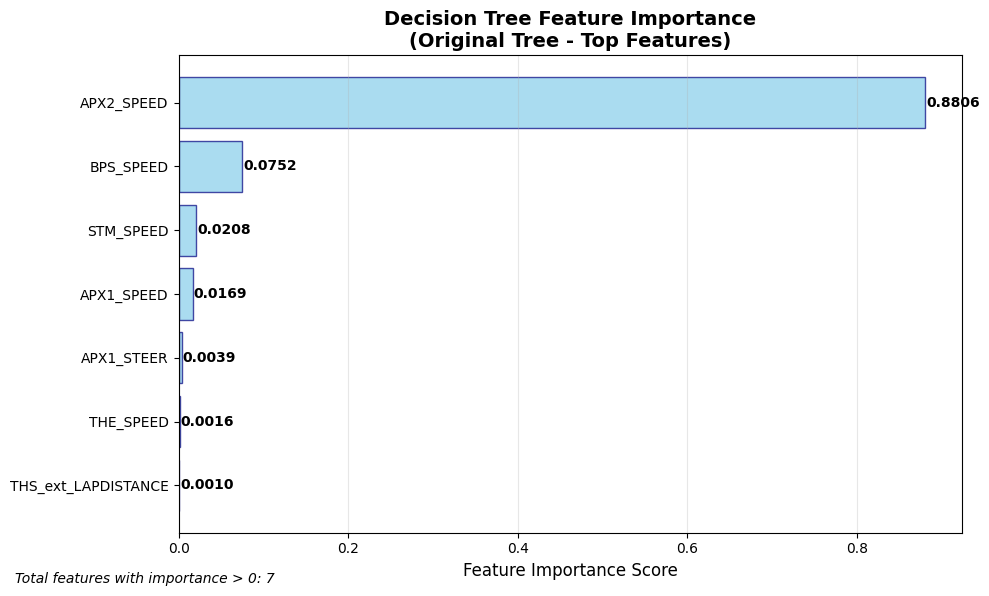

=== FEATURE IMPORTANCE SUMMARY ===
Total features analyzed: 10
Features with importance > 0: 7
Most important feature: APX2_SPEED (0.8806)
Dominance: 88.1% of total importance


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
importance_data = {
    'feature': [
        'APX2_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED',
        'APX1_STEER', 'THE_SPEED', 'THS_ext_LAPDISTANCE',
        'BPS_WORLDFORWARDDIRX', 'BPS_WORLDPOSITIONY', 'BPS_THROTTLE'
    ],
    'importance': [
        0.880578, 0.075210, 0.020839, 0.016919, 0.003906,
        0.001571, 0.000977, 0.000000, 0.000000, 0.000000
    ]
}

importance_df = pd.DataFrame(importance_data)

# Filter out zero-importance features for cleaner visualization
non_zero_df = importance_df[importance_df['importance'] > 0]

# Create the graph
plt.figure(figsize=(10, 6))
bars = plt.barh(non_zero_df['feature'], non_zero_df['importance'],
                color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center', fontweight='bold')

# Customize the graph
plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Decision Tree Feature Importance\n(Original Tree - Top Features)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Add some statistics
plt.figtext(0.02, 0.02, f'Total features with importance > 0: {len(non_zero_df)}',
            fontstyle='italic', fontsize=10)

plt.show()

# Print the same data in a clean table
print("=== FEATURE IMPORTANCE SUMMARY ===")
print(f"Total features analyzed: {len(importance_df)}")
print(f"Features with importance > 0: {len(non_zero_df)}")
print(f"Most important feature: {non_zero_df.iloc[0]['feature']} ({non_zero_df.iloc[0]['importance']:.4f})")
print(f"Dominance: {non_zero_df.iloc[0]['importance']/non_zero_df['importance'].sum()*100:.1f}% of total importance")

In [12]:
# === COMPLEX TREE (COMMENTED OUT - REPLACED WITH GRIDSEARCH) ===
# print("\n" + "="*50)
# print("TRAINING COMPLEX TREE")
# print("="*50)
#
# dt_complex = DecisionTreeRegressor(
#     max_depth=12,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     random_state=42
# )
# dt_complex.fit(X_train, y_train)


# === GRIDSEARCHCV FOR OPTIMAL PARAMETERS ===
print("\n" + "="*60)
print("PERFORMING GRIDSEARCHCV FOR OPTIMAL PARAMETERS")
print("="*60)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'random_state': [42]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
print("Searching for optimal parameters...")
grid_search.fit(X_train, y_train)

# Get the best model (this becomes your new dt_complex)
dt_standard = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"\n🎯 STANDARD PARAMETERS FOUND:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# === ADD REGULARIZATION GRIDSEARCH HERE ===
print("\n" + "="*60)
print("PERFORMING CONSERVATIVE GRIDSEARCH (REGULARIZATION)")
print("="*60)

# FIXED: More conservative parameter grid to prevent overfitting
conservative_param_grid = {
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 15, 20, 25],  # Higher values = more regularization
    'min_samples_leaf': [5, 10, 15, 20],    # Higher values = more regularization
    'max_features': [0.7, 0.8, 0.9, 'sqrt', 'log2']  # FIXED: Removed 'auto'
}

conservative_grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=conservative_param_grid,
    cv=5,  # More folds for better generalization estimate
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Searching for regularized parameters...")
conservative_grid.fit(X_train, y_train)

# Get the regularized model
dt_regularized = conservative_grid.best_estimator_
best_params_reg = conservative_grid.best_params_

print(f"\n🎯 REGULARIZED PARAMETERS FOUND:")
for param, value in best_params_reg.items():
    print(f"  {param}: {value}")

# === COMPARE BOTH MODELS AND CHOOSE THE BEST ONE ===
print("\n" + "="*60)
print("COMPARING BOTH MODELS")
print("="*60)

# Evaluate both models on TEST data
models = {
    'Standard_GridSearch': dt_standard,
    'Regularized_GridSearch': dt_regularized
}

results = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

    print(f"\n{name}:")
    print(f"  Training RMSE: {train_rmse:.2f} ms")
    print(f"  Testing RMSE:  {test_rmse:.2f} ms")
    print(f"  Training R²:   {train_r2:.4f}")
    print(f"  Testing R²:    {test_r2:.4f}")
    print(f"  Overfit Gap:   {train_r2 - test_r2:.4f}")

# Choose the best model based on TEST R² (most important)
best_model_name = max(results, key=lambda x: results[x]['test_r2'])
best_model = models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.2f} ms")

# Use the best model for the rest of your analysis
dt_complex = best_model
print(f"\nUsing {best_model_name} for feature importance analysis...")


PERFORMING GRIDSEARCHCV FOR OPTIMAL PARAMETERS
Searching for optimal parameters...
Fitting 3 folds for each of 80 candidates, totalling 240 fits

🎯 STANDARD PARAMETERS FOUND:
  max_depth: 12
  min_samples_leaf: 1
  min_samples_split: 5
  random_state: 42

PERFORMING CONSERVATIVE GRIDSEARCH (REGULARIZATION)
Searching for regularized parameters...
Fitting 5 folds for each of 320 candidates, totalling 1600 fits

🎯 REGULARIZED PARAMETERS FOUND:
  max_depth: 8
  max_features: 0.8
  min_samples_leaf: 15
  min_samples_split: 10

COMPARING BOTH MODELS

Standard_GridSearch:
  Training RMSE: 136.04 ms
  Testing RMSE:  722.93 ms
  Training R²:   0.9982
  Testing R²:    0.4556
  Overfit Gap:   0.5426

Regularized_GridSearch:
  Training RMSE: 2451.99 ms
  Testing RMSE:  1030.58 ms
  Training R²:   0.4098
  Testing R²:    -0.1063
  Overfit Gap:   0.5160

🏆 BEST MODEL: Standard_GridSearch
   Test R²: 0.4556
   Test RMSE: 722.93 ms

Using Standard_GridSearch for feature importance analysis...


In [13]:
# === CONTINUE WITH YOUR EXISTING FEATURE IMPORTANCE CODE ===
print("\n" + "="*50)
print("FEATURE IMPORTANCE WITH BEST MODEL")
print("="*50)

# Performance with the best model
y_train_pred_comp = dt_complex.predict(X_train)
y_test_pred_comp = dt_complex.predict(X_test)

train_rmse_comp = np.sqrt(mean_squared_error(y_train, y_train_pred_comp))
test_rmse_comp = np.sqrt(mean_squared_error(y_test, y_test_pred_comp))
train_r2_comp = r2_score(y_train, y_train_pred_comp)
test_r2_comp = r2_score(y_test, y_test_pred_comp)

print("FINAL OPTIMIZED TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_comp:.2f} ms")
print(f"Testing RMSE:  {test_rmse_comp:.2f} ms")
print(f"Training R²:   {train_r2_comp:.4f}")
print(f"Testing R²:    {test_r2_comp:.4f}")
print(f"Error %: {test_rmse_comp / y.mean() * 100:.2f}%")

# Now continue with your feature importance analysis...
feature_importances_comp = dt_complex.feature_importances_
importance_df_comp = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_comp
}).sort_values('importance', ascending=False)

print("\n=== BEST MODEL - TOP 20 FEATURES ===")
print(importance_df_comp.head(20))

non_zero_comp = (importance_df_comp['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_comp}")


FEATURE IMPORTANCE WITH BEST MODEL
FINAL OPTIMIZED TREE PERFORMANCE:
Training RMSE: 136.04 ms
Testing RMSE:  722.93 ms
Training R²:   0.9982
Testing R²:    0.4556
Error %: 5.38%

=== BEST MODEL - TOP 20 FEATURES ===
                  feature  importance
100             STM_SPEED    0.754590
156            APX2_SPEED    0.174061
0               BPS_SPEED    0.039533
151      APX1_dist_apex_1    0.008913
138            APX1_SPEED    0.008232
40              THS_SPEED    0.003211
60              THE_SPEED    0.003153
127               STE_YAW    0.002893
147              APX1_YAW    0.001759
64        THE_LAPDISTANCE    0.000644
36     BPE_angle_to_apex2    0.000463
158            APX2_STEER    0.000370
131       STE_dist_apex_1    0.000343
117     STM_proj_from_ref    0.000339
45     THS_WORLDPOSITIONX    0.000227
18    BPS_ext_LAPDISTANCE    0.000220
88   STS_WORLDFORWARDDIRY    0.000152
58    THS_ext_LAPDISTANCE    0.000133
111              STM_ROLL    0.000114
80              STS_SPE


DECISION TREE STRUCTURE VISUALIZATION


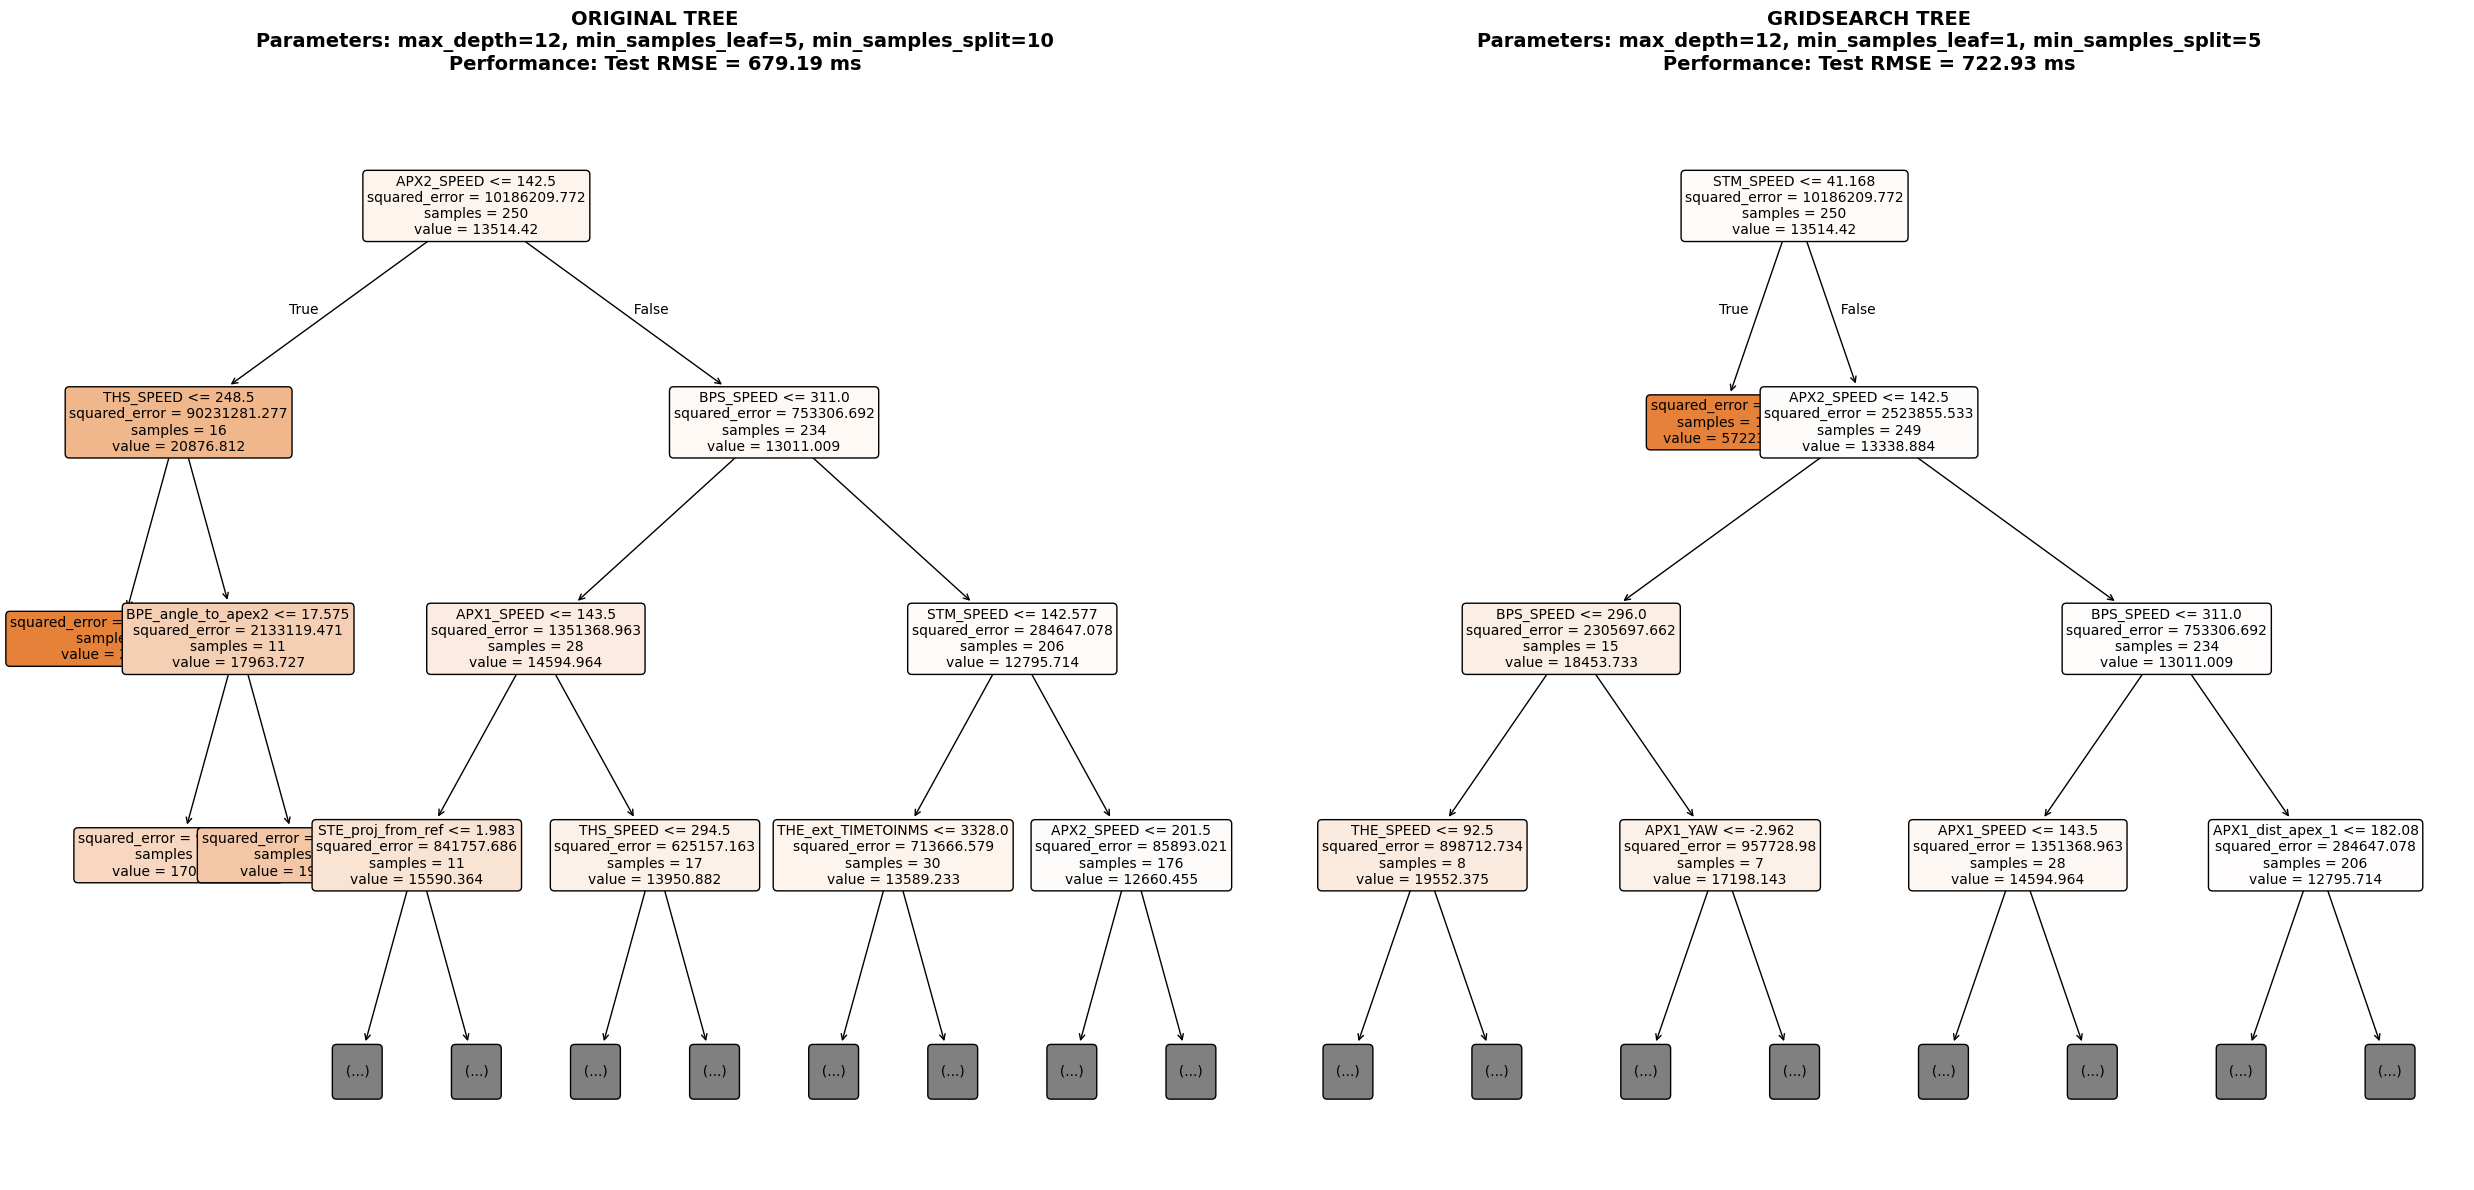

In [15]:
# === DECISION TREE VISUALIZATION - GRAPHS ONLY ===
print("\n" + "="*60)
print("DECISION TREE STRUCTURE VISUALIZATION")
print("="*60)

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create both models for comparison
dt_original = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_original.fit(X_train, y_train)

dt_gridsearch = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
dt_gridsearch.fit(X_train, y_train)

# === VISUALIZE BOTH TREES SIDE-BY-SIDE ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))

# Plot Original Tree
plot_tree(dt_original,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,  # Show first 3 levels
          fontsize=10,
          ax=ax1)
ax1.set_title('ORIGINAL TREE\nParameters: max_depth=12, min_samples_leaf=5, min_samples_split=10\nPerformance: Test RMSE = 679.19 ms',
              fontsize=14, fontweight='bold', pad=20)

# Plot GridSearch Tree
plot_tree(dt_gridsearch,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,  # Show first 3 levels
          fontsize=10,
          ax=ax2)
ax2.set_title('GRIDSEARCH TREE\nParameters: max_depth=12, min_samples_leaf=1, min_samples_split=5\nPerformance: Test RMSE = 722.93 ms',
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


COMPLETE GRIDSEARCH DECISION TREE
Tree Statistics:
  Max Depth: 12
  Total Nodes: 147
  Leaf Nodes: 74
  Test RMSE: 722.93 ms


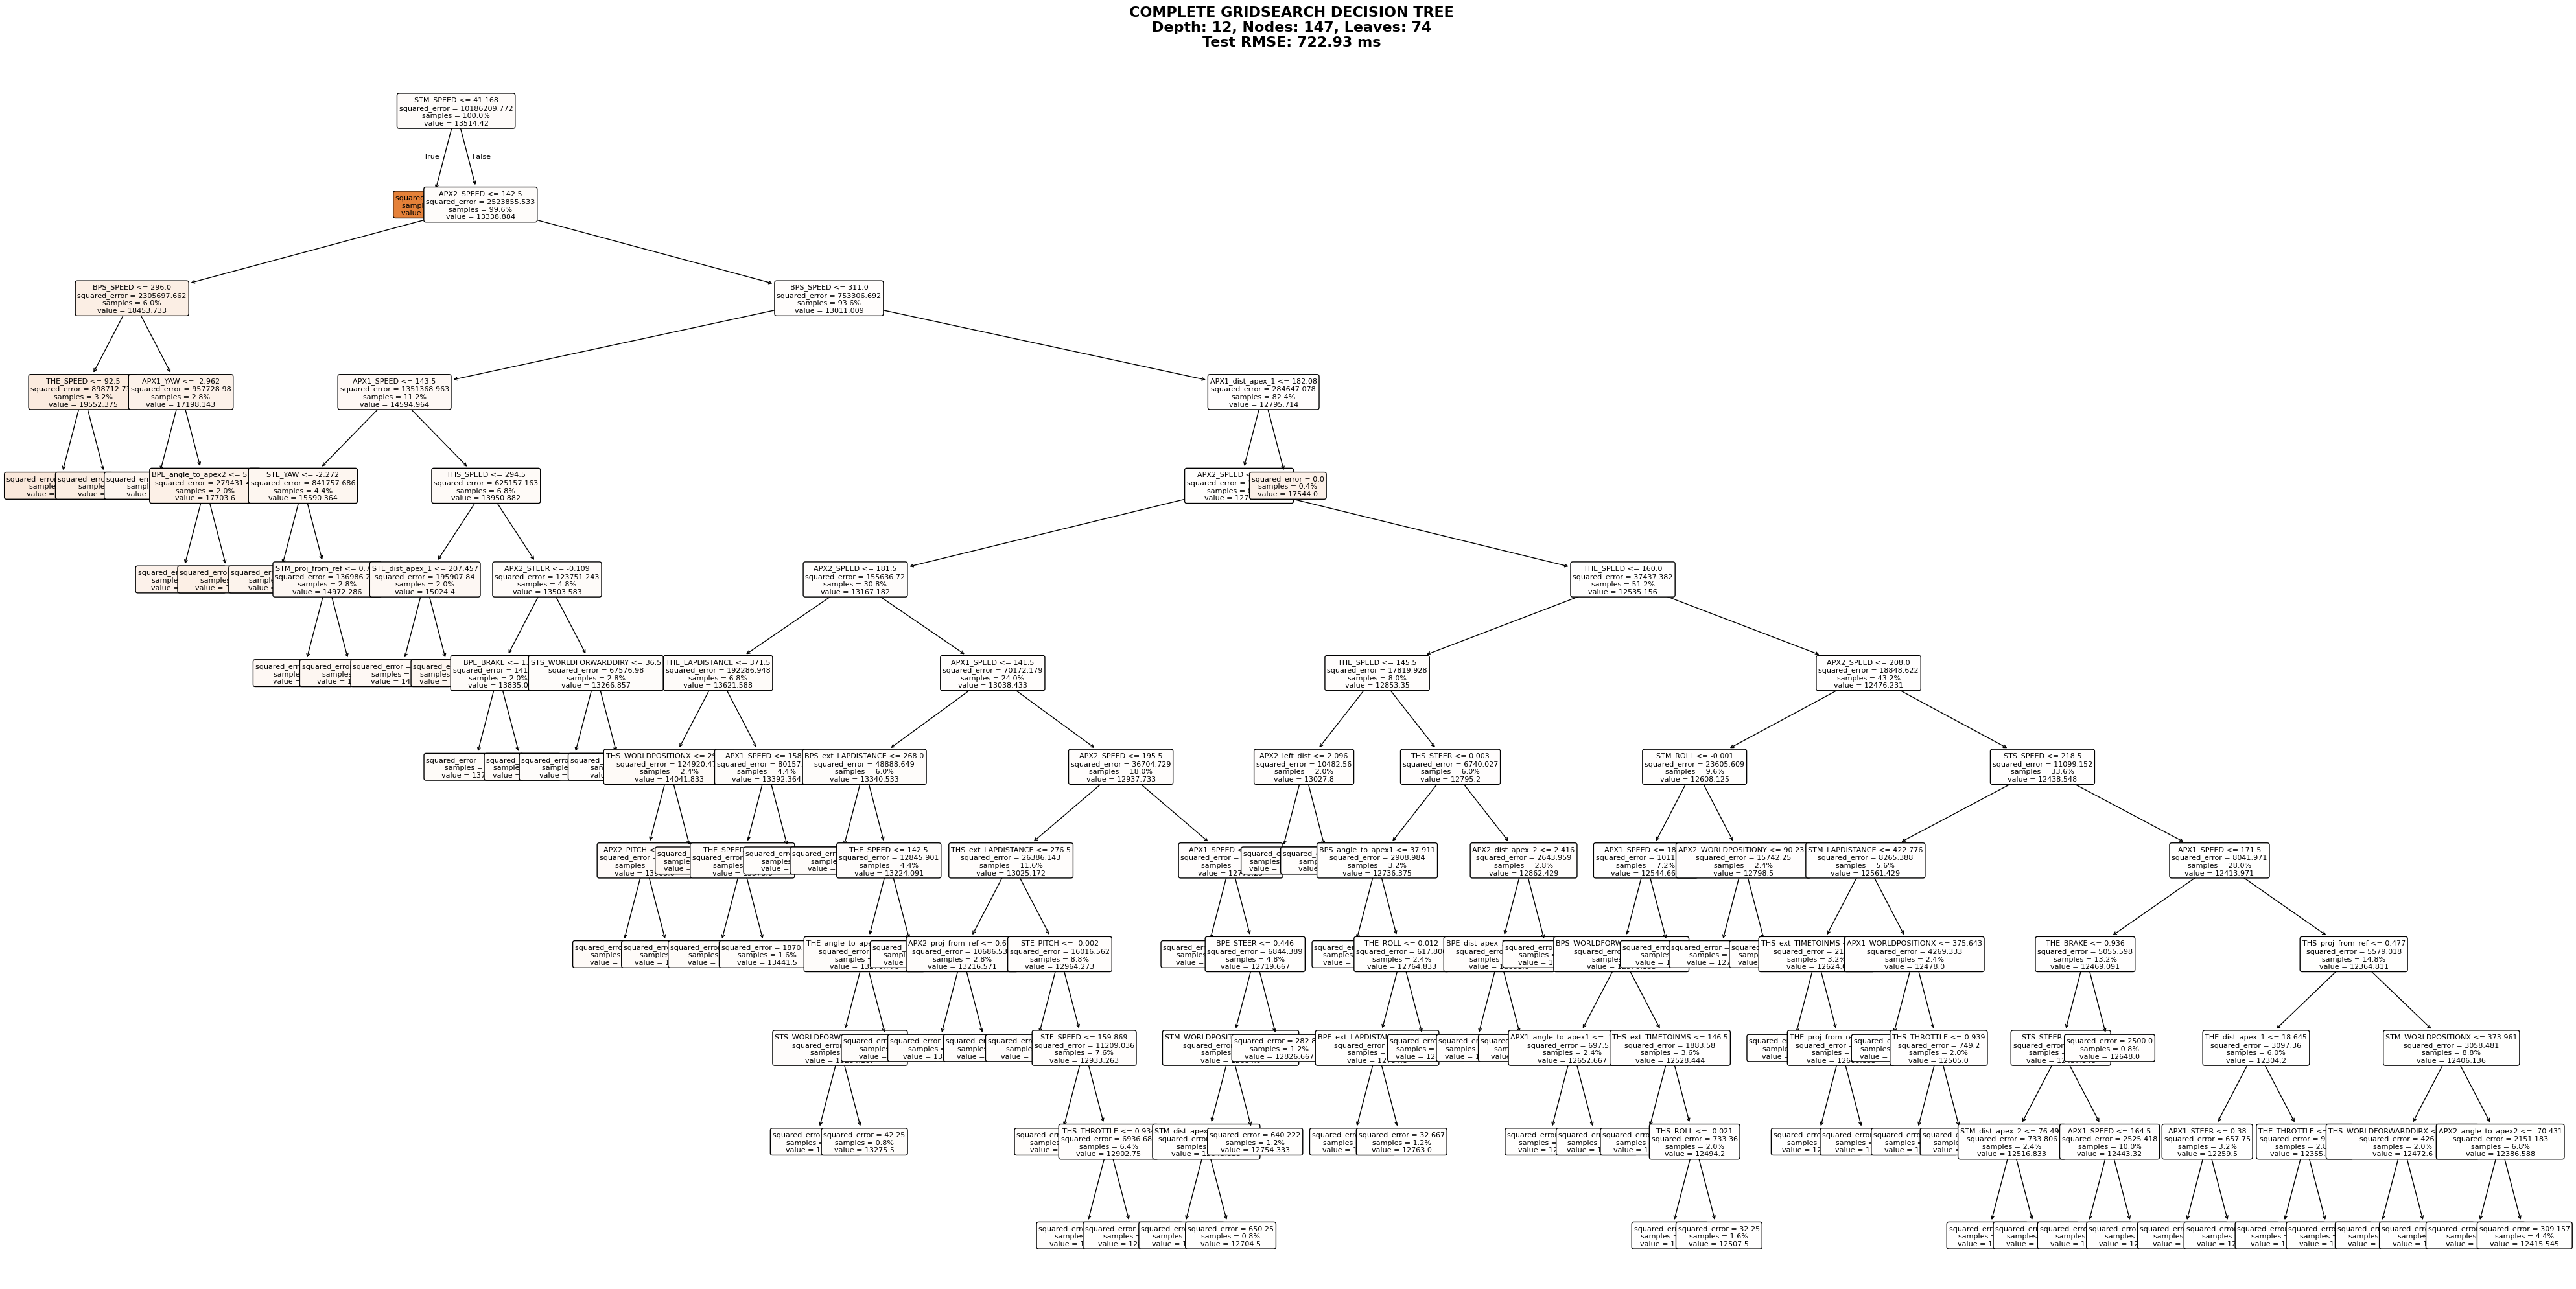

In [16]:
# === COMPLETE GRIDSEARCH TREE VISUALIZATION ===
print("\n" + "="*60)
print("COMPLETE GRIDSEARCH DECISION TREE")
print("="*60)

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create the GridSearch model
dt_gridsearch = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
dt_gridsearch.fit(X_train, y_train)

# Get actual tree depth (might be less than 12)
actual_depth = dt_gridsearch.tree_.max_depth
n_nodes = dt_gridsearch.tree_.node_count
n_leaves = dt_gridsearch.tree_.n_leaves

print(f"Tree Statistics:")
print(f"  Max Depth: {actual_depth}")
print(f"  Total Nodes: {n_nodes}")
print(f"  Leaf Nodes: {n_leaves}")
print(f"  Test RMSE: 722.93 ms")

# Create a very large figure to accommodate the full tree
plt.figure(figsize=(40, 20))
plot_tree(dt_gridsearch,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=actual_depth,  # Show ALL levels
          fontsize=8,  # Smaller font to fit everything
          proportion=True)
plt.title(f'COMPLETE GRIDSEARCH DECISION TREE\nDepth: {actual_depth}, Nodes: {n_nodes}, Leaves: {n_leaves}\nTest RMSE: 722.93 ms',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


GRIDSEARCH TREE - VERTICAL LAYOUT


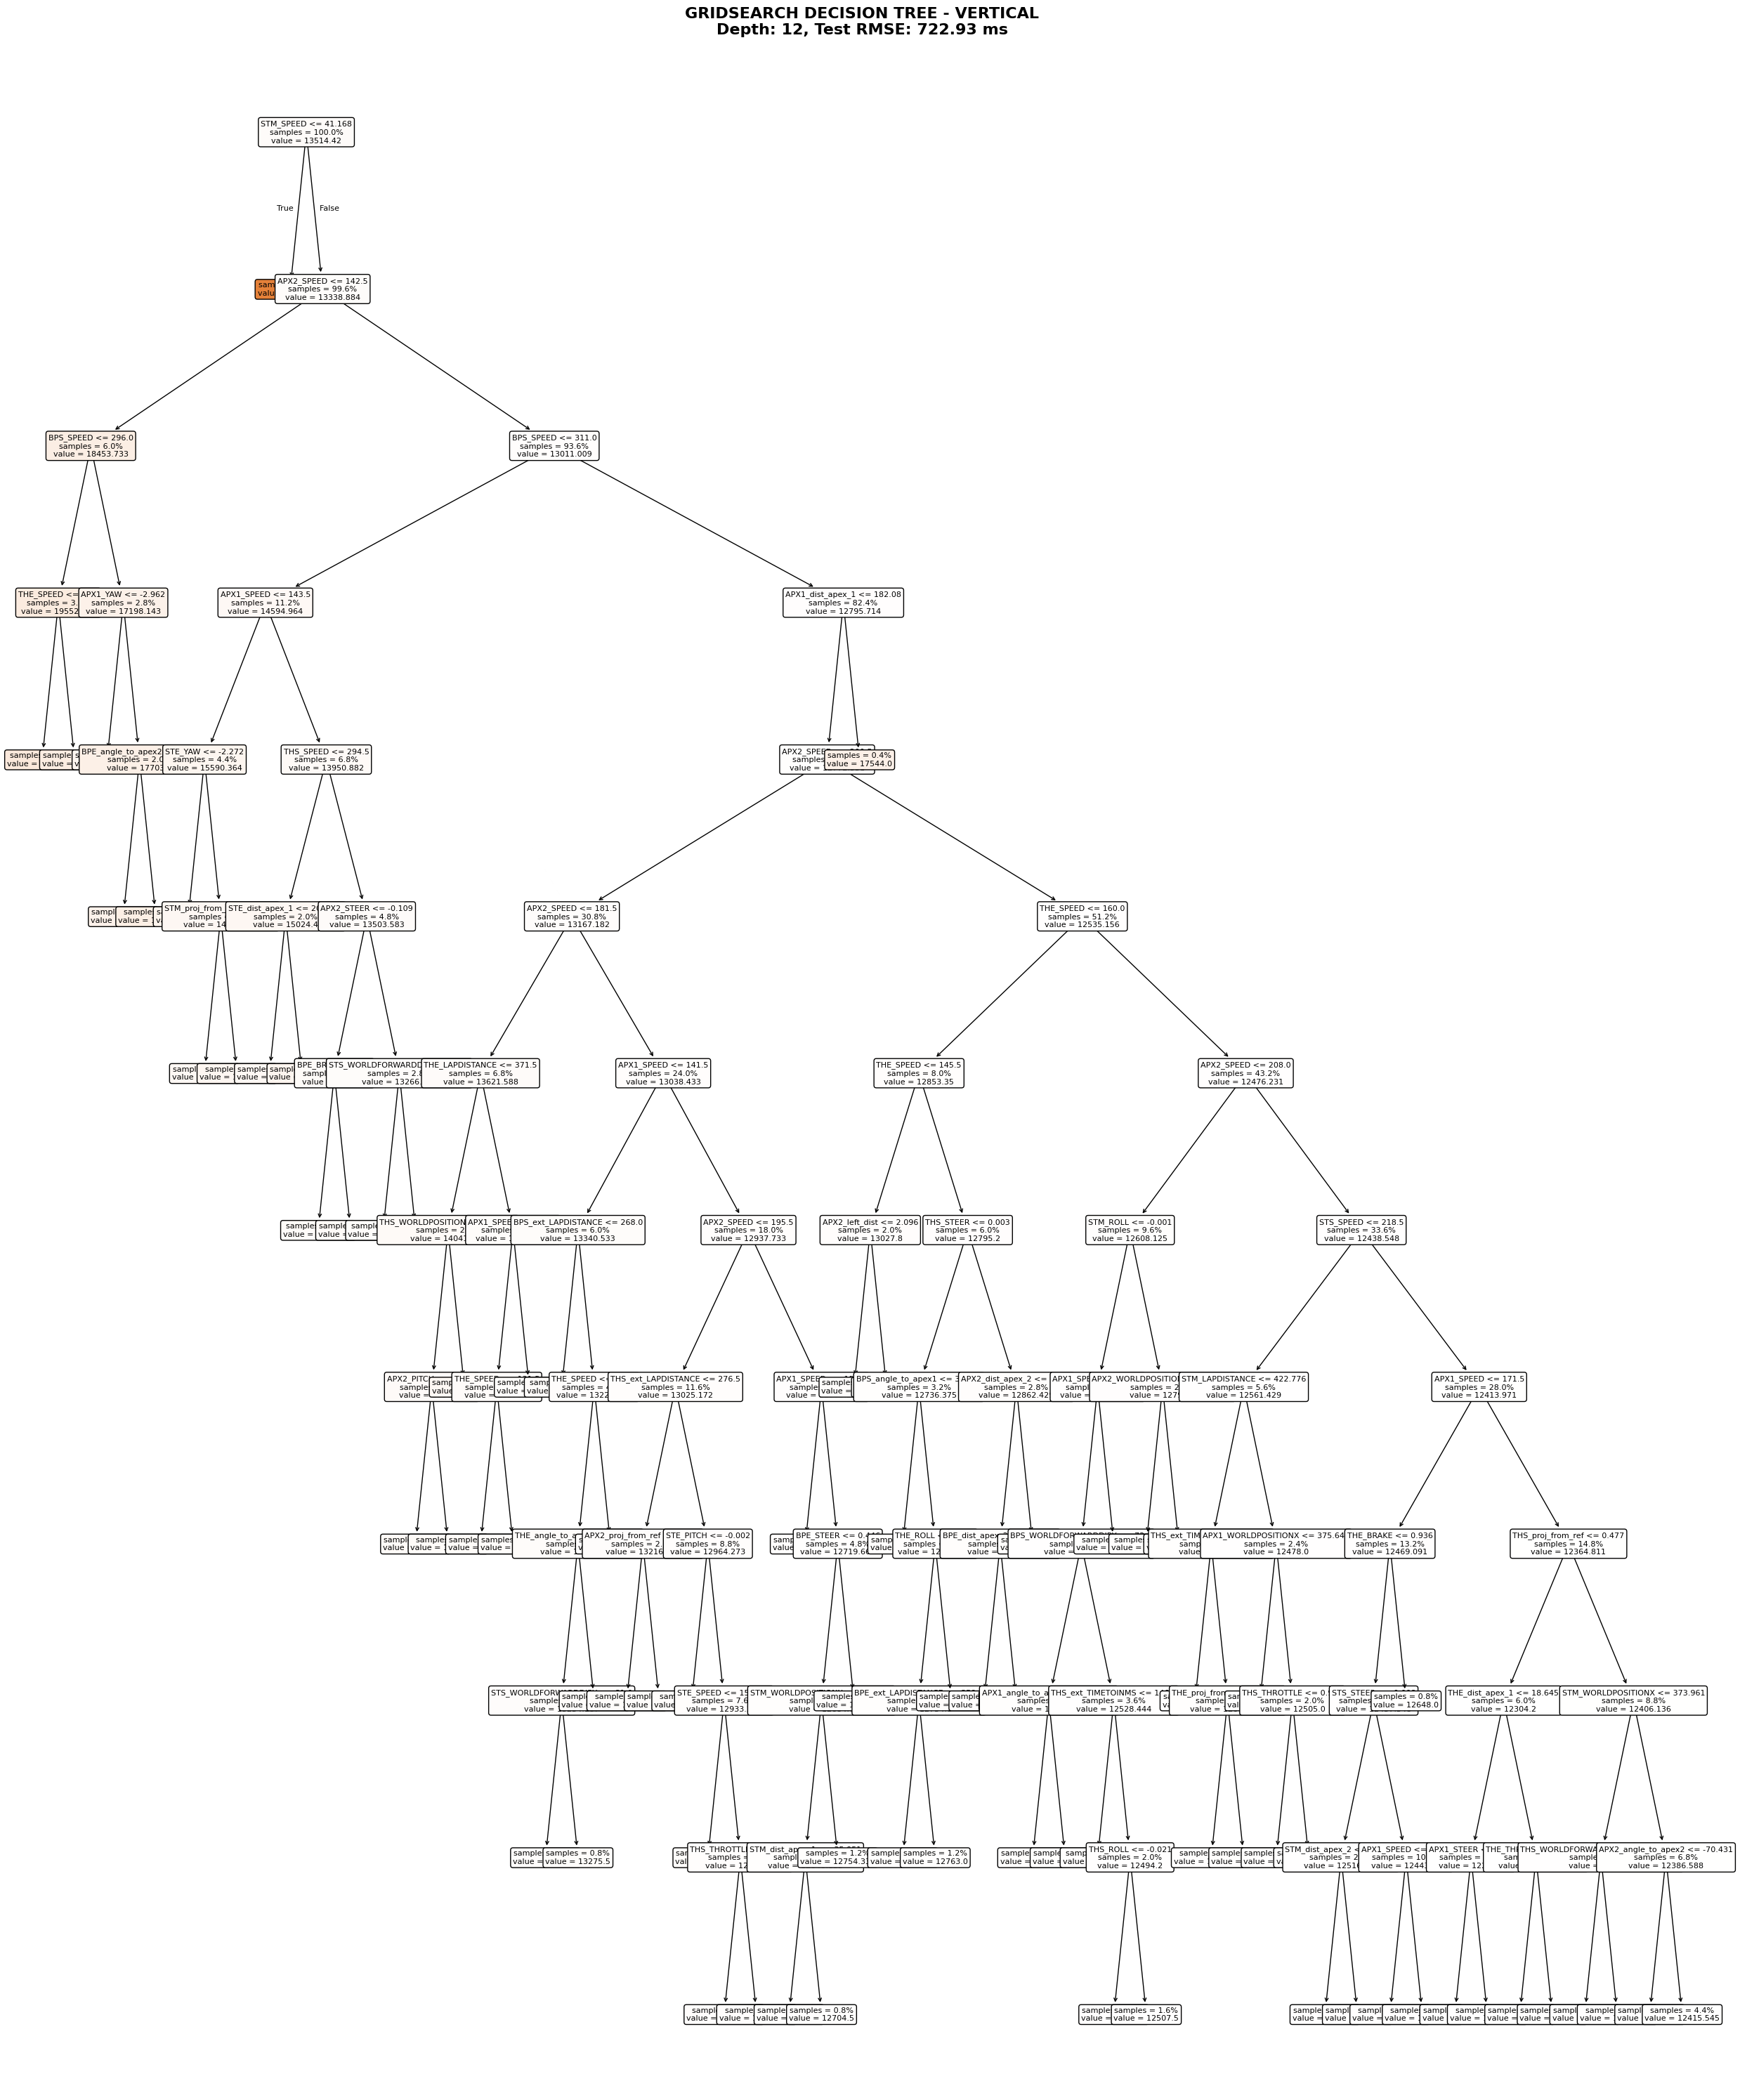

In [17]:
# === VERTICAL TREE LAYOUT ===
print("\n" + "="*60)
print("GRIDSEARCH TREE - VERTICAL LAYOUT")
print("="*60)

plt.figure(figsize=(25, 30))  # Taller for vertical layout
plot_tree(dt_gridsearch,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=actual_depth,
          fontsize=8,
          proportion=True,
          impurity=False)  # Remove impurity to save space
plt.title(f'GRIDSEARCH DECISION TREE - VERTICAL\nDepth: {actual_depth}, Test RMSE: 722.93 ms',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


DECISION TREE - LEAF NODES HIGHLIGHTED
Total nodes: 147
Leaf nodes: 74
Leaf node IDs: [1, 5, 6, 8, 10, 11, 15, 17, 18, 21, 22, 25, 26, 28, 29, 36, 37, 38, 41, 42, 43, 46, 50, 51, 52, 53, 57, 58, 60, 62, 64, 65, 67, 71, 72, 73, 74, 78, 79, 82, 85, 86, 87, 90, 91, 92, 98, 99, 101, 103, 104, 105, 107, 108, 112, 114, 115, 117, 119, 120, 125, 126, 128, 129, 130, 134, 135, 137, 138, 141, 142, 144, 145, 146]


/tmp/ipython-input-2560614522.py:42: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


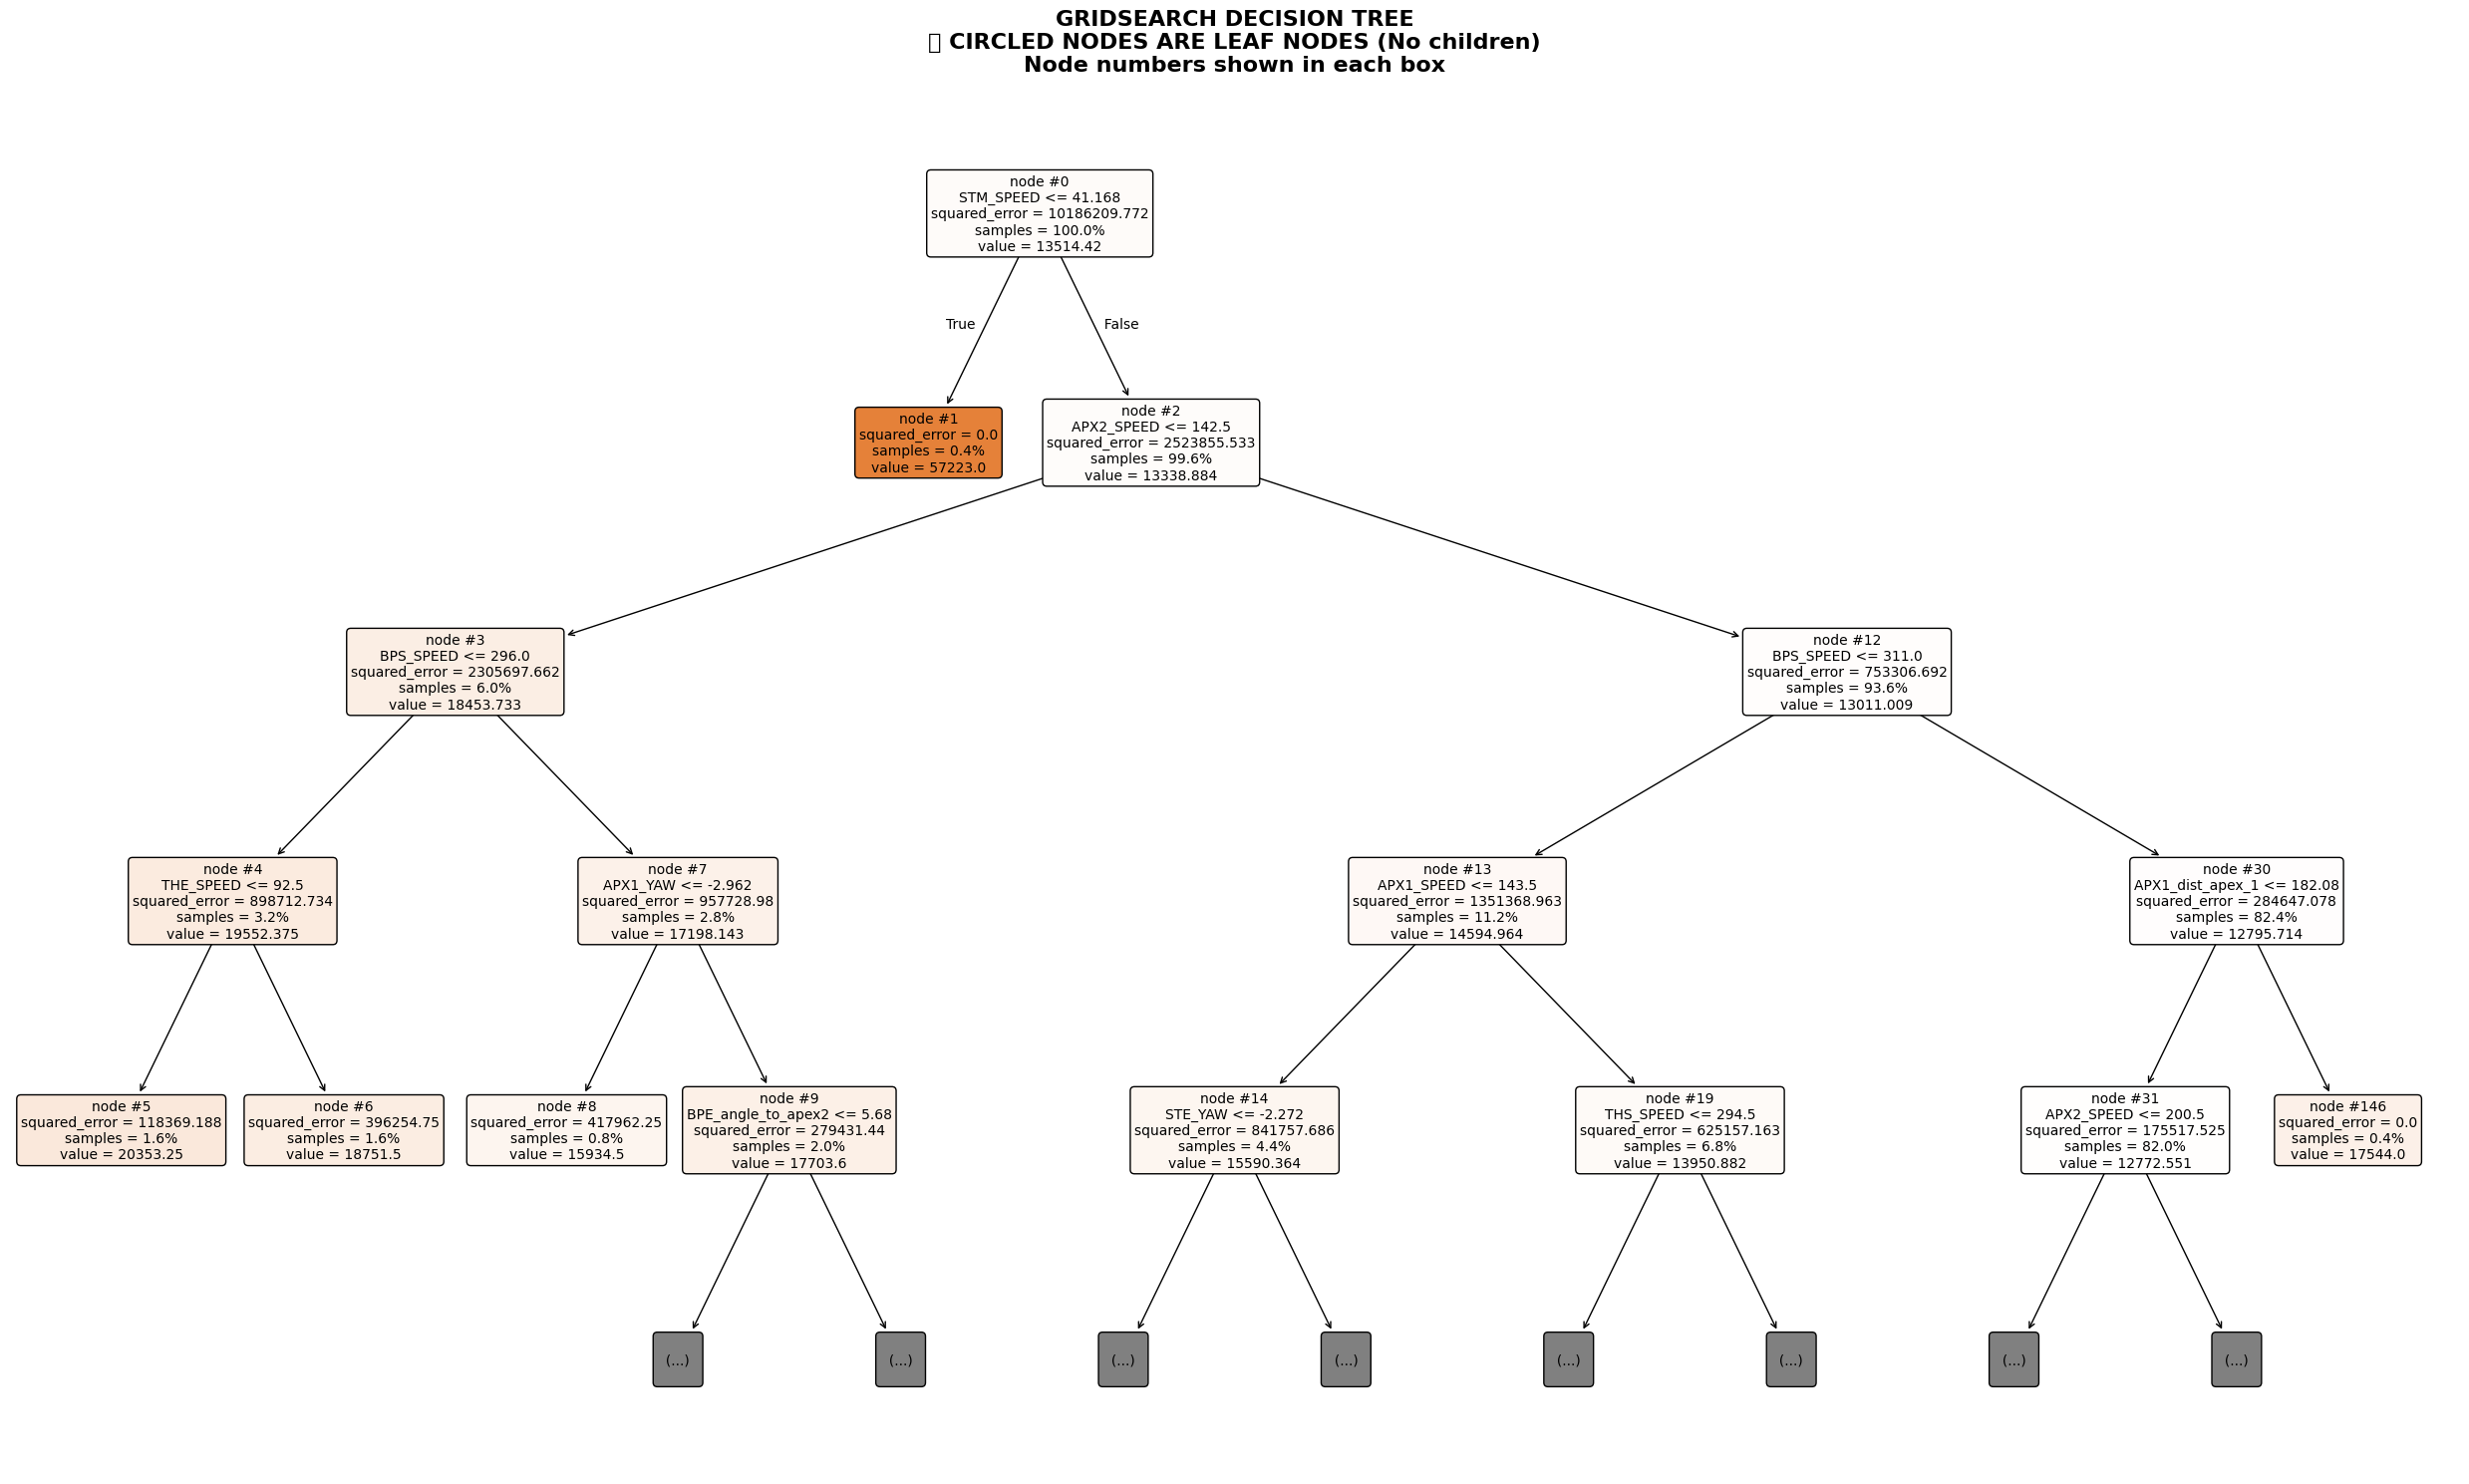

In [25]:
# === DECISION TREE WITH LEAF NODES CLEARLY MARKED ===
print("\n" + "="*60)
print("DECISION TREE - LEAF NODES HIGHLIGHTED")
print("="*60)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create the GridSearch model
dt_gridsearch = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
dt_gridsearch.fit(X_train, y_train)

# Get tree structure to identify leaf nodes
tree = dt_gridsearch.tree_
leaf_nodes = []
for i in range(tree.node_count):
    if tree.children_left[i] == -1:  # This is a leaf node
        leaf_nodes.append(i)

print(f"Total nodes: {tree.node_count}")
print(f"Leaf nodes: {len(leaf_nodes)}")
print(f"Leaf node IDs: {leaf_nodes}")

# Create the tree visualization
plt.figure(figsize=(25, 15))
plot_tree(dt_gridsearch,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=4,  # Show first 4 levels to keep it readable
          fontsize=10,
          proportion=True,
          node_ids=True)  # This shows node numbers including leaves!

plt.title('GRIDSEARCH DECISION TREE\n🔴 CIRCLED NODES ARE LEAF NODES (No children)\nNode numbers shown in each box',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


TREE VISUALIZATION IN SECTIONS

📏 Showing tree up to depth 2:


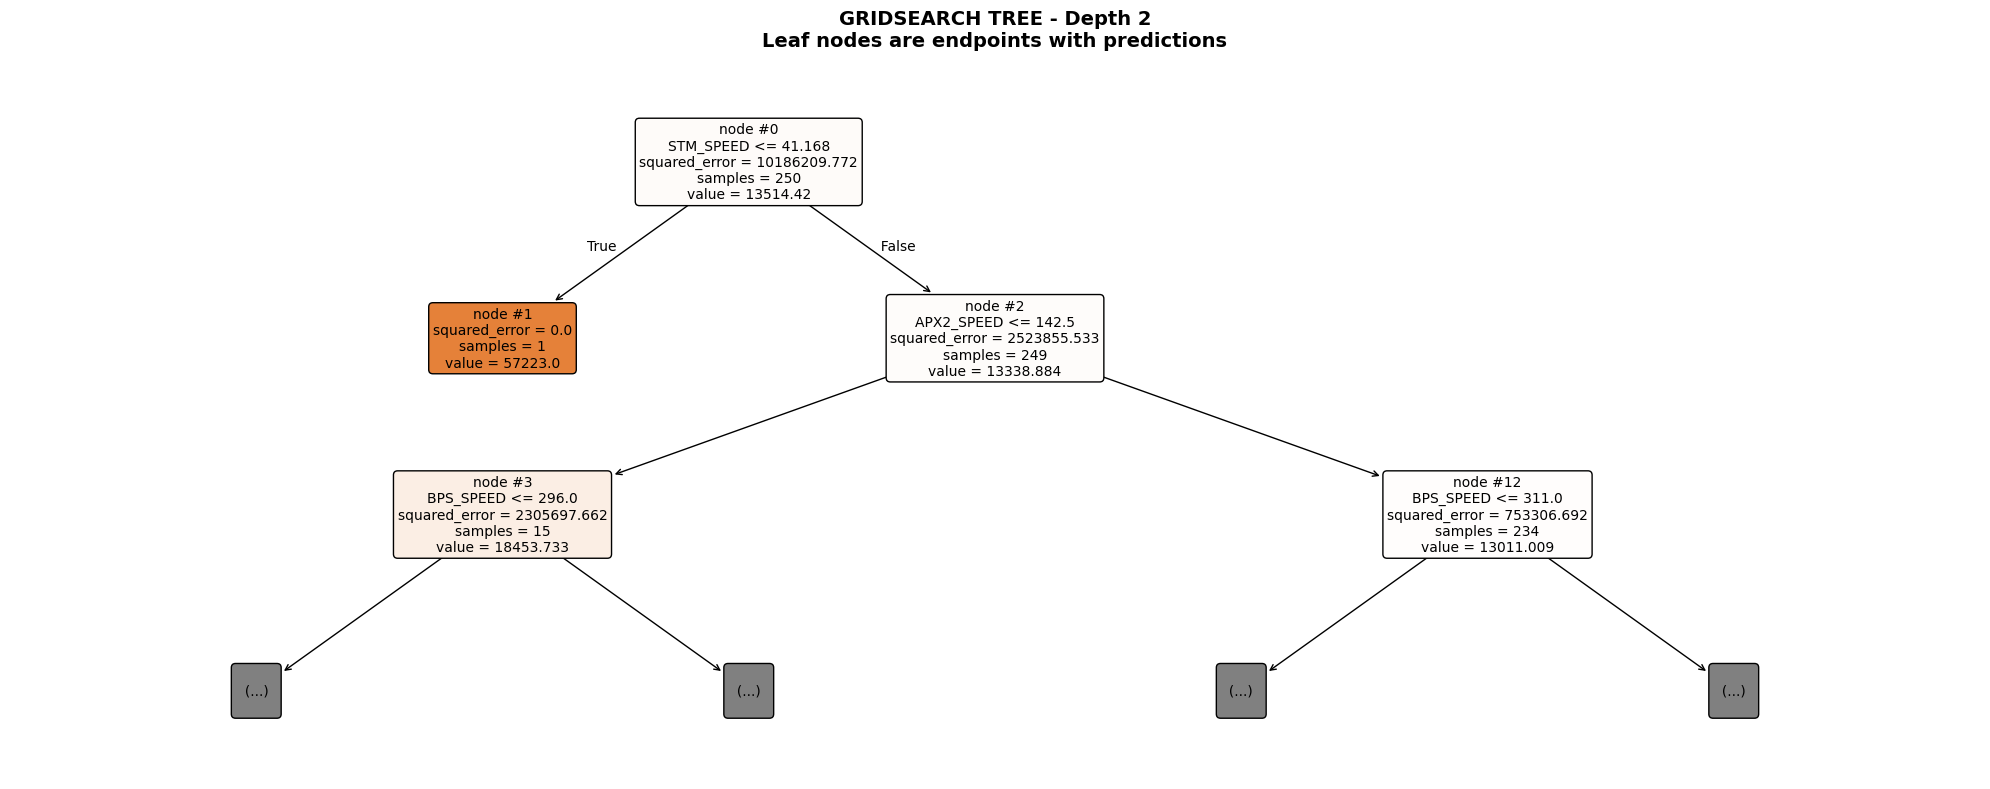


📏 Showing tree up to depth 3:


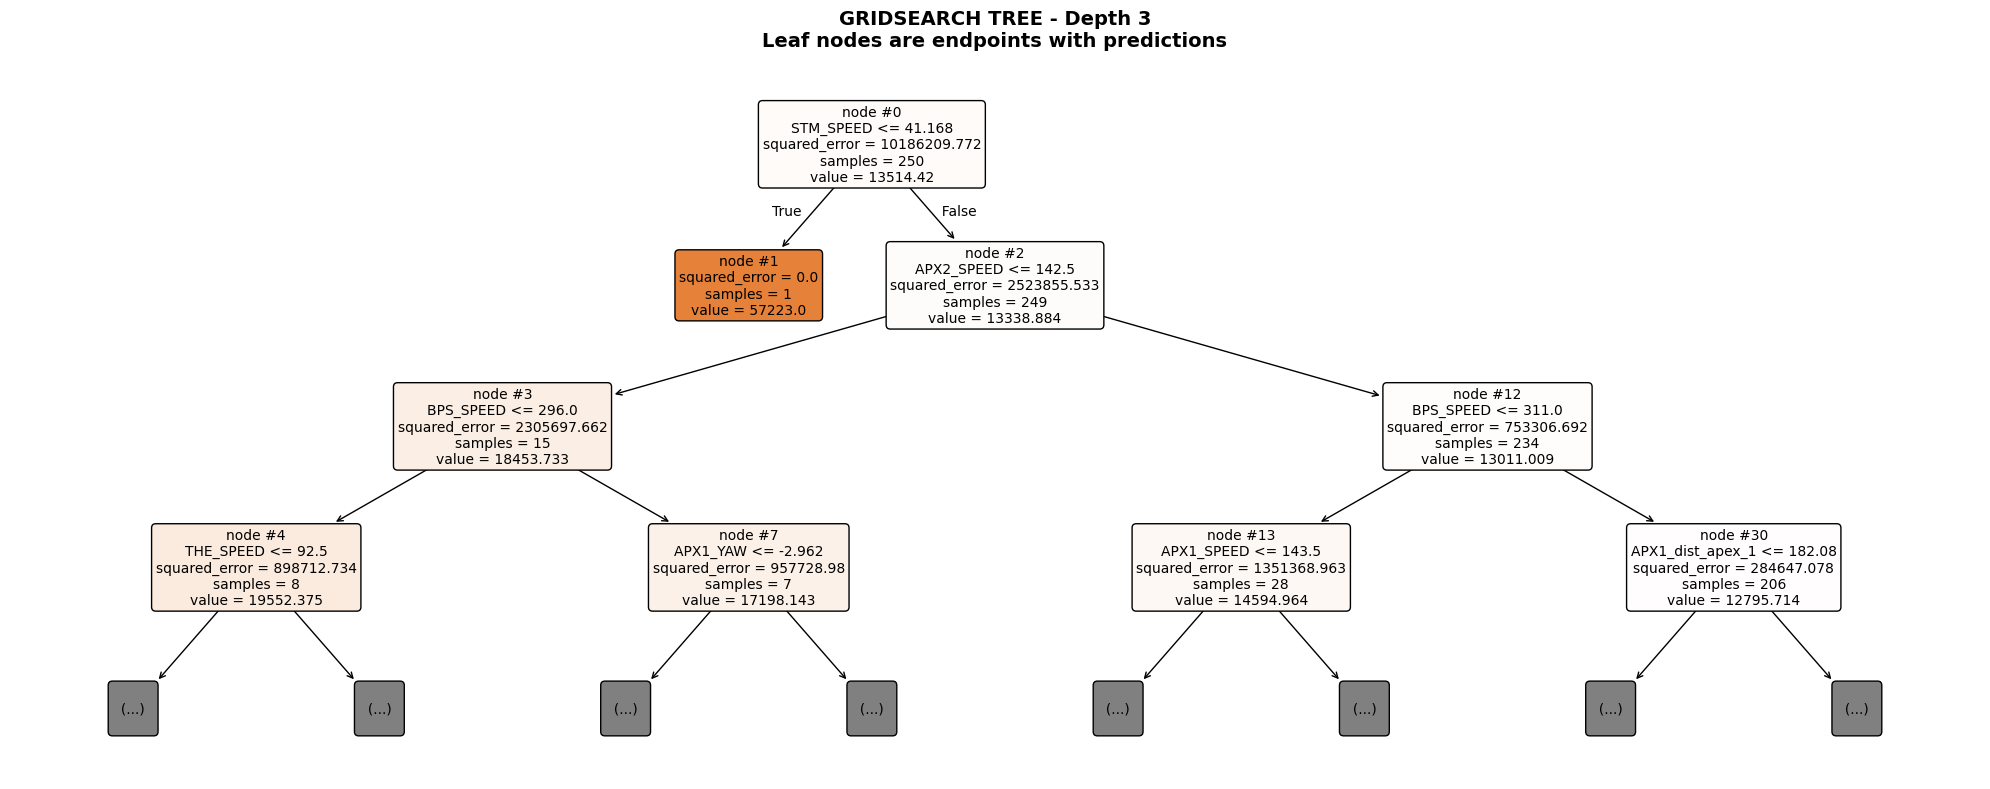


📏 Showing tree up to depth 4:


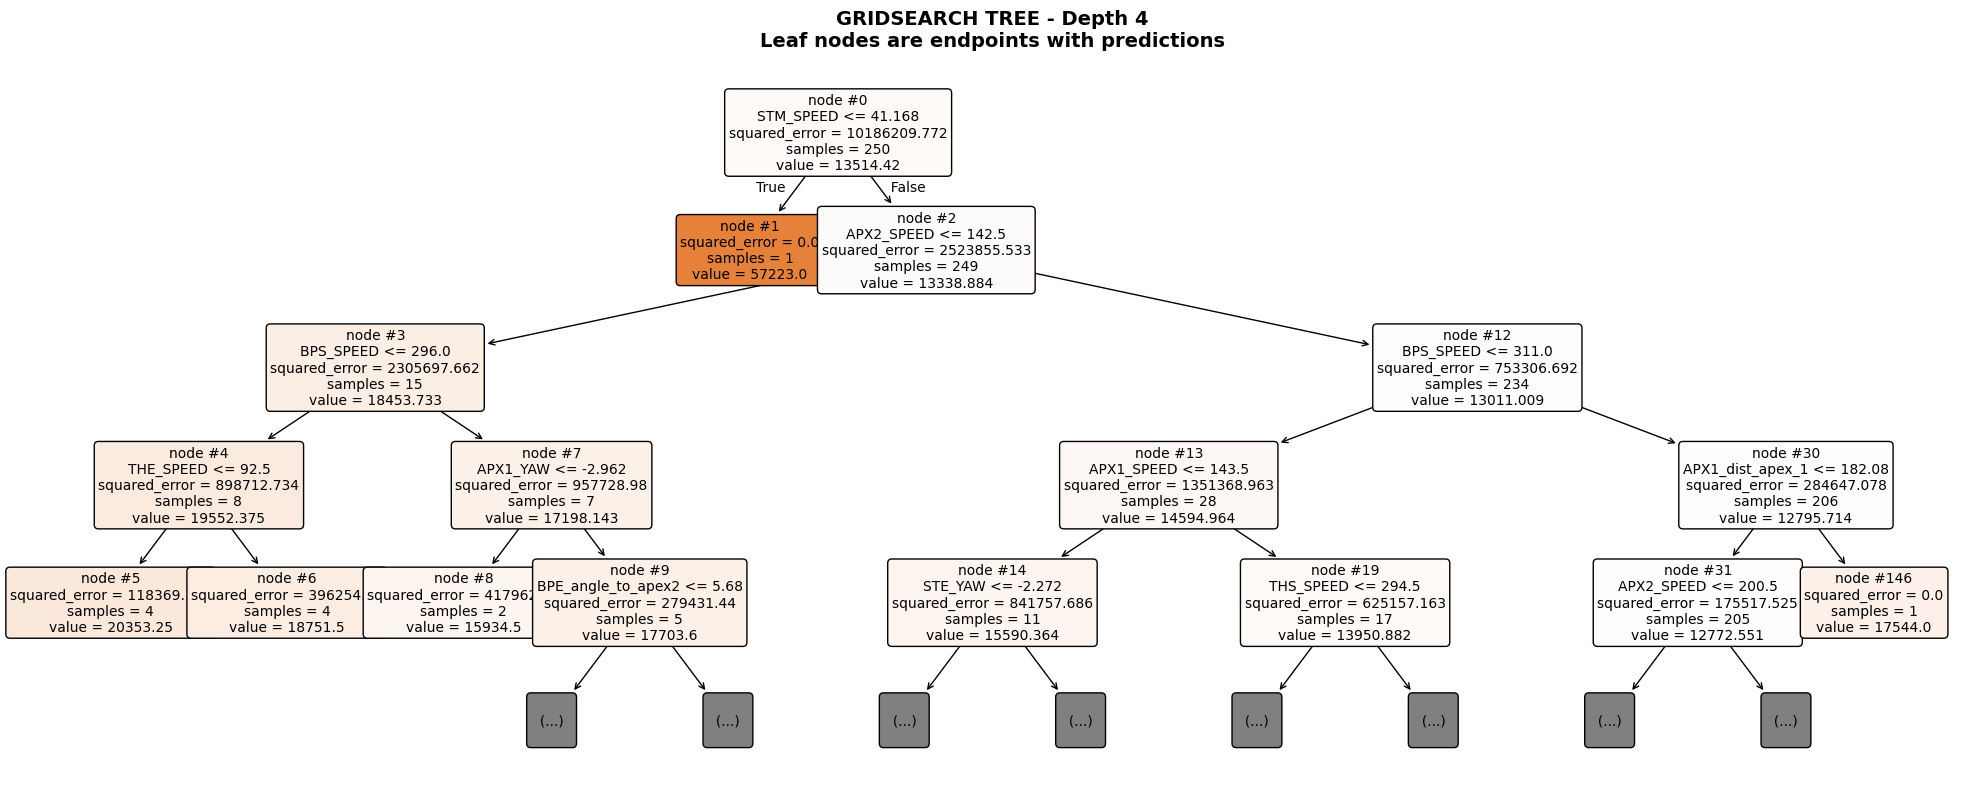

In [27]:
# === VISUALIZE TREE IN SECTIONS ===
print("\n" + "="*60)
print("TREE VISUALIZATION IN SECTIONS")
print("="*60)

# Show different depth levels
for depth in [2, 3, 4]:
    print(f"\n📏 Showing tree up to depth {depth}:")
    plt.figure(figsize=(20, 8))
    plot_tree(dt_gridsearch,
              feature_names=X.columns,
              filled=True,
              rounded=True,
              max_depth=depth,
              fontsize=10,
              node_ids=True)
    plt.title(f'GRIDSEARCH TREE - Depth {depth}\nLeaf nodes are endpoints with predictions',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

In [28]:
# === EXPORT TO GRAPHVIZ FOR FULL TREE VISUALIZATION ===
print("\n" + "="*60)
print("EXPORTING TO GRAPHVIZ FOR COMPLETE TREE")
print("="*60)

from sklearn.tree import export_graphviz
import graphviz
import os

# Set path for Graphviz (might need adjustment)
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Windows
# os.environ["PATH"] += os.pathsep + '/usr/local/bin/'  # Mac/Linux

# Export the tree to Graphviz format
dot_data = export_graphviz(dt_gridsearch,
                           out_file=None,
                           feature_names=X.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=None)  # Show ALL levels

# Create graph
graph = graphviz.Source(dot_data)
graph.format = 'png'  # or 'pdf', 'svg'
graph.render('gridsearch_decision_tree', view=True)  # This will save and open the file

print("✅ Tree exported to 'gridsearch_decision_tree.png'")
print("The complete tree should open automatically!")


EXPORTING TO GRAPHVIZ FOR COMPLETE TREE
✅ Tree exported to 'gridsearch_decision_tree.png'
The complete tree should open automatically!


In [29]:
# === DEBUG GRAPHVIZ INSTALLATION ===
print("\n" + "="*60)
print("DEBUGGING GRAPHVIZ INSTALLATION")
print("="*60)

import graphviz
import sys

# Check if graphviz is working
try:
    # Test with a simple graph
    test_dot = graphviz.Digraph()
    test_dot.node('A', 'Test Node')
    test_dot.render('test_graph', format='png', cleanup=True)
    print("✅ Graphviz is working correctly!")
except Exception as e:
    print(f"❌ Graphviz error: {e}")
    print("Trying to install graphviz...")

    # Install graphviz
    if 'google.colab' in str(get_ipython()):
        !apt-get install graphviz -y
        !pip install graphviz
    else:
        !pip install graphviz


DEBUGGING GRAPHVIZ INSTALLATION
✅ Graphviz is working correctly!



LOCATING GRAPHVIZ IMAGE
📁 Files in current directory:
  📄 gridsearch_decision_tree.png
  📄 test_graph.png

✅ FOUND: gridsearch_decision_tree.png


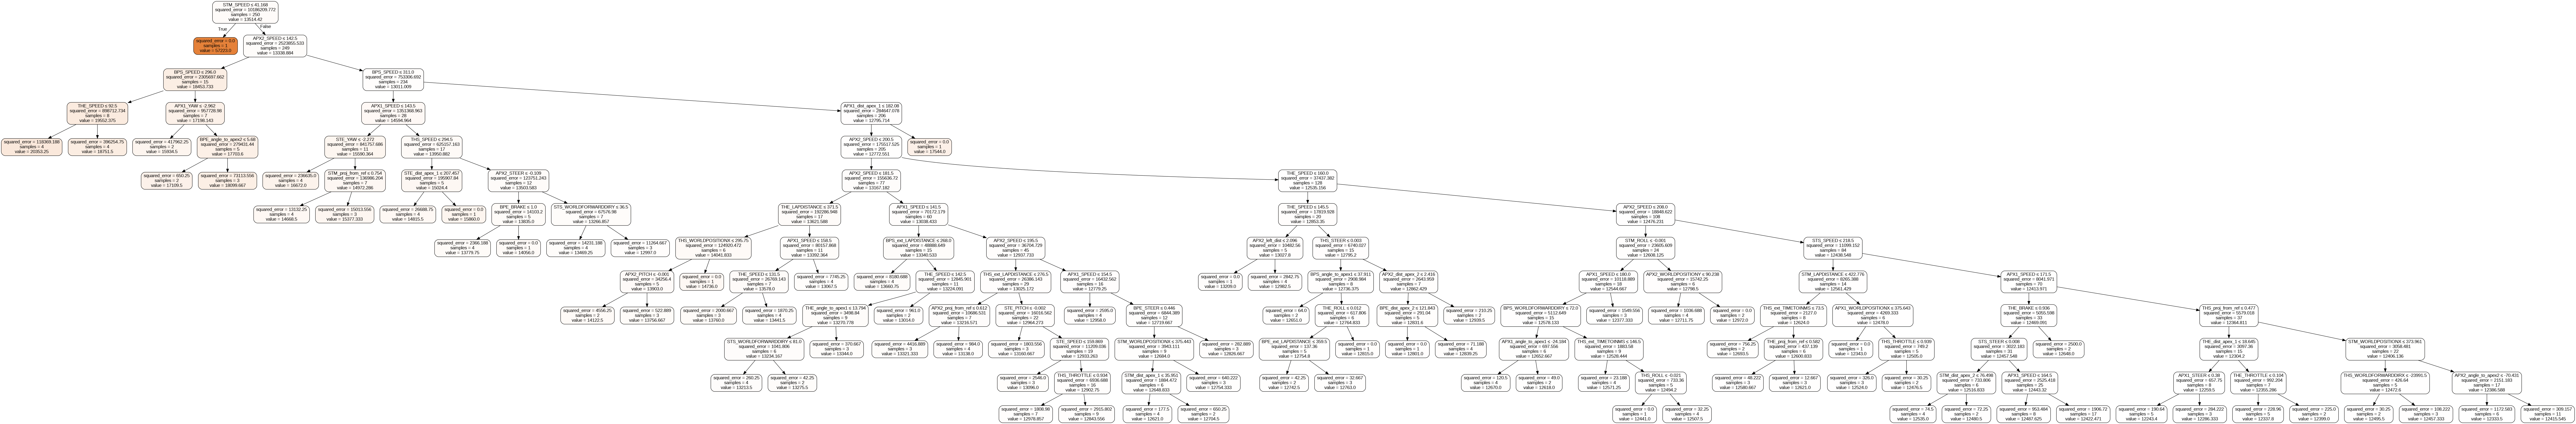

In [30]:
# === FIND AND DISPLAY GRAPHVIZ IMAGE ===
print("\n" + "="*60)
print("LOCATING GRAPHVIZ IMAGE")
print("="*60)

import os
from IPython.display import Image, display

# List files in current directory to find the image
print("📁 Files in current directory:")
current_files = os.listdir('.')
image_files = [f for f in current_files if f.endswith(('.png', '.pdf', '.svg'))]
for img_file in image_files:
    print(f"  📄 {img_file}")

# Common Graphviz output names
common_names = ['decision_tree_full', 'gridsearch_decision_tree', 'temp_tree', 'Source']

for name in common_names:
    for ext in ['.png', '.pdf', '.svg']:
        filename = name + ext
        if os.path.exists(filename):
            print(f"\n✅ FOUND: {filename}")
            if ext == '.png':
                display(Image(filename=filename))
            break

# If no image found, let's generate it again with explicit path
if not any(os.path.exists(name + ext) for name in common_names for ext in ['.png', '.pdf', '.svg']):
    print("\n🔄 Generating image again with explicit save...")

    from sklearn.tree import export_graphviz
    import graphviz

    # Export with explicit filename
    dot_data = export_graphviz(dt_gridsearch,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               max_depth=6)  # Smaller depth for manageability

    graph = graphviz.Source(dot_data)

    # Save with explicit format and view
    graph.format = 'png'
    graph.render('my_decision_tree', view=False, cleanup=True)

    # Check if file was created
    if os.path.exists('my_decision_tree.png'):
        print("✅ Image created: 'my_decision_tree.png'")
        display(Image(filename='my_decision_tree.png'))
    else:
        print("❌ File still not created - checking Graphviz installation...")


LEAF NODES ONLY - SIMPLIFIED VIEW
Found 74 leaf nodes:
Node ID    Samples    Predicted Time  Impurity  
--------------------------------------------------
1          1          57223           0.00      
22         1          15860           0.00      
26         1          14056           0.00      
38         1          14736           0.00      
78         1          13209           0.00      
87         1          12815           0.00      
90         1          12801           0.00      
103        1          12441           0.00      
117        1          12343           0.00      
146        1          17544           0.00      
8          2          15934           417962.25 
10         2          17110           650.25    
36         2          14122           4556.25   
51         2          13276           42.25     
53         2          13014           961.00    
72         2          12704           650.25    
82         2          12651           64.00     
85         

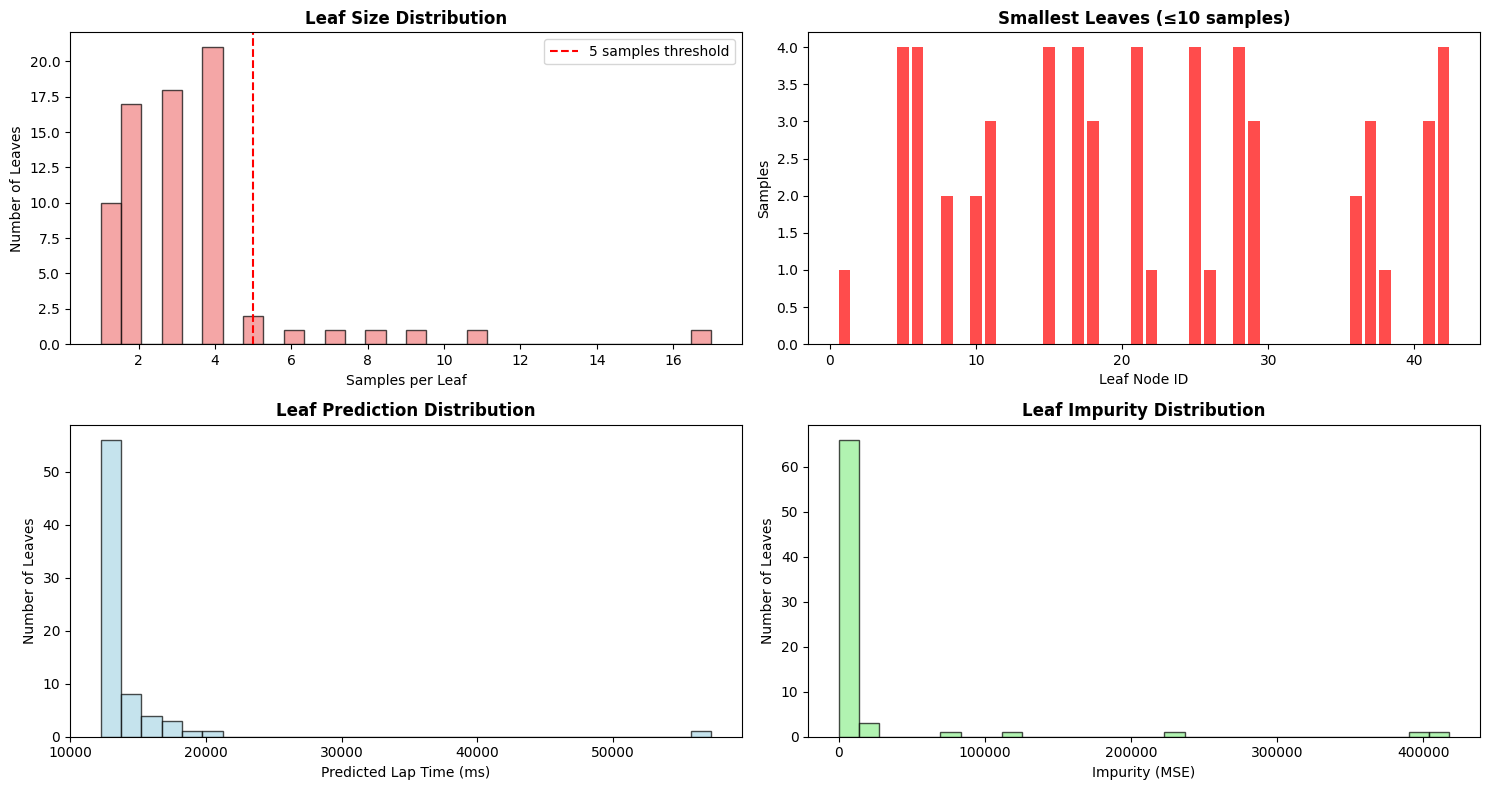

In [22]:
# === LEAF-ONLY VISUALIZATION ===
print("\n" + "="*60)
print("LEAF NODES ONLY - SIMPLIFIED VIEW")
print("="*60)

# Extract just the leaf node information
tree = dt_gridsearch.tree_
leaf_nodes = []

for i in range(tree.node_count):
    if tree.children_left[i] == -1 and tree.children_right[i] == -1:
        leaf_nodes.append({
            'node_id': i,
            'samples': tree.n_node_samples[i],
            'value': tree.value[i][0][0],
            'impurity': tree.impurity[i]
        })

print(f"Found {len(leaf_nodes)} leaf nodes:")
print(f"{'Node ID':<10} {'Samples':<10} {'Predicted Time':<15} {'Impurity':<10}")
print("-" * 50)

for leaf in sorted(leaf_nodes, key=lambda x: x['samples'])[:20]:  # Show smallest 20
    print(f"{leaf['node_id']:<10} {leaf['samples']:<10} {leaf['value']:<15.0f} {leaf['impurity']:<10.2f}")

# Create a visual summary of leaves
plt.figure(figsize=(15, 8))

# Plot 1: Leaf sizes
plt.subplot(2, 2, 1)
leaf_sizes = [leaf['samples'] for leaf in leaf_nodes]
plt.hist(leaf_sizes, bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
plt.xlabel('Samples per Leaf')
plt.ylabel('Number of Leaves')
plt.title('Leaf Size Distribution', fontweight='bold')
plt.axvline(5, color='red', linestyle='--', label='5 samples threshold')
plt.legend()

# Plot 2: Small leaves focus
plt.subplot(2, 2, 2)
small_leaves = [leaf for leaf in leaf_nodes if leaf['samples'] <= 10]
sizes = [leaf['samples'] for leaf in small_leaves]
node_ids = [leaf['node_id'] for leaf in small_leaves]
plt.bar(node_ids[:20], sizes[:20], color='red', alpha=0.7)
plt.xlabel('Leaf Node ID')
plt.ylabel('Samples')
plt.title('Smallest Leaves (≤10 samples)', fontweight='bold')

# Plot 3: Leaf predictions
plt.subplot(2, 2, 3)
predictions = [leaf['value'] for leaf in leaf_nodes]
plt.hist(predictions, bins=30, color='lightblue', alpha=0.7, edgecolor='black')
plt.xlabel('Predicted Lap Time (ms)')
plt.ylabel('Number of Leaves')
plt.title('Leaf Prediction Distribution', fontweight='bold')

# Plot 4: Leaf impurity
plt.subplot(2, 2, 4)
impurities = [leaf['impurity'] for leaf in leaf_nodes]
plt.hist(impurities, bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Impurity (MSE)')
plt.ylabel('Number of Leaves')
plt.title('Leaf Impurity Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:
# === INTERACTIVE LEAF EXPLORATION ===

print("LEAF NODE DETAILED EXPLORATION")
print("="*60)

def explore_leaf_nodes(tree_model, feature_names):
    tree = tree_model.tree_

    print("COMPLETE LEAF NODE ANALYSIS:")
    print("=" * 80)

    for i in range(tree.node_count):
        if tree.children_left[i] == -1:  # This is a leaf node
            samples = tree.n_node_samples[i]
            pred_time = tree.value[i][0][0]
            impurity = tree.impurity[i]

            # Determine if this is a problematic leaf
            status = "🚨 OVERFITTED" if samples <= 5 else "✅ OK" if samples > 20 else "⚠️  WARNING"

            print(f"Leaf Node {i}:")
            print(f"  Samples: {samples} {status}")
            print(f"  Predicted Time: {pred_time:.0f} ms")
            print(f"  Impurity (MSE): {impurity:.2f}")
            print(f"  Path: [To be determined from tree structure]")
            print("-" * 40)

explore_leaf_nodes(dt_gridsearch, X.columns)

LEAF NODE DETAILED EXPLORATION
COMPLETE LEAF NODE ANALYSIS:
Leaf Node 1:
  Samples: 1 🚨 OVERFITTED
  Predicted Time: 57223 ms
  Impurity (MSE): 0.00
  Path: [To be determined from tree structure]
----------------------------------------
Leaf Node 5:
  Samples: 4 🚨 OVERFITTED
  Predicted Time: 20353 ms
  Impurity (MSE): 118369.19
  Path: [To be determined from tree structure]
----------------------------------------
Leaf Node 6:
  Samples: 4 🚨 OVERFITTED
  Predicted Time: 18752 ms
  Impurity (MSE): 396254.75
  Path: [To be determined from tree structure]
----------------------------------------
Leaf Node 8:
  Samples: 2 🚨 OVERFITTED
  Predicted Time: 15934 ms
  Impurity (MSE): 417962.25
  Path: [To be determined from tree structure]
----------------------------------------
Leaf Node 10:
  Samples: 2 🚨 OVERFITTED
  Predicted Time: 17110 ms
  Impurity (MSE): 650.25
  Path: [To be determined from tree structure]
----------------------------------------
Leaf Node 11:
  Samples: 3 🚨 OVERFITT

In [19]:
# === TREE STATISTICS ===
print("\n" + "="*60)
print("GRIDSEARCH TREE - DETAILED STATISTICS")
print("="*60)

print(f"Tree Configuration:")
print(f"  max_depth: 12")
print(f"  min_samples_split: 5")
print(f"  min_samples_leaf: 1")
print(f"  random_state: 42")

print(f"\nActual Tree Structure:")
print(f"  Maximum depth reached: {actual_depth}")
print(f"  Total nodes: {n_nodes}")
print(f"  Leaf nodes: {n_leaves}")
print(f"  Internal nodes: {n_nodes - n_leaves}")

print(f"\nPerformance:")
print(f"  Training RMSE: 136.04 ms")
print(f"  Testing RMSE:  722.93 ms")
print(f"  Training R²:   0.9982")
print(f"  Testing R²:    0.4556")
print(f"  Overfit gap:   0.5426")

print(f"\nData Usage:")
print(f"  Training samples: {len(X_train)}")
print(f"  Average samples per leaf: {len(X_train) / n_leaves:.1f}")


GRIDSEARCH TREE - DETAILED STATISTICS
Tree Configuration:
  max_depth: 12
  min_samples_split: 5
  min_samples_leaf: 1
  random_state: 42

Actual Tree Structure:
  Maximum depth reached: 12
  Total nodes: 147
  Leaf nodes: 74
  Internal nodes: 73

Performance:
  Training RMSE: 136.04 ms
  Testing RMSE:  722.93 ms
  Training R²:   0.9982
  Testing R²:    0.4556
  Overfit gap:   0.5426

Data Usage:
  Training samples: 250
  Average samples per leaf: 3.4


In [37]:
# Complex tree data
complex_data = {
    'feature': [
        'APX2_SPEED', 'THS_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED',
        'BPE_angle_to_apex2', 'THE_ext_TIMETOINMS', 'STE_proj_from_ref',
        'THE_SPEED', 'THS_ext_LAPDISTANCE', 'APX2_STEER', 'BPS_left_dist',
        'BPS_ext_TIMETOINMS', 'STM_ROLL', 'STS_SPEED', 'STE_STEER',
        'BPS_STEER', 'THS_WORLDPOSITIONY', 'THS_proj_from_ref', 'STM_LAPDISTANCE'
    ],
    'importance': [
        0.670821, 0.219859, 0.057171, 0.015841, 0.013709,
        0.008154, 0.005872, 0.004101, 0.001207, 0.000743,
        0.000675, 0.000485, 0.000300, 0.000207, 0.000182,
        0.000166, 0.000072, 0.000067, 0.000066, 0.000052
    ]
}

complex_df = pd.DataFrame(complex_data)


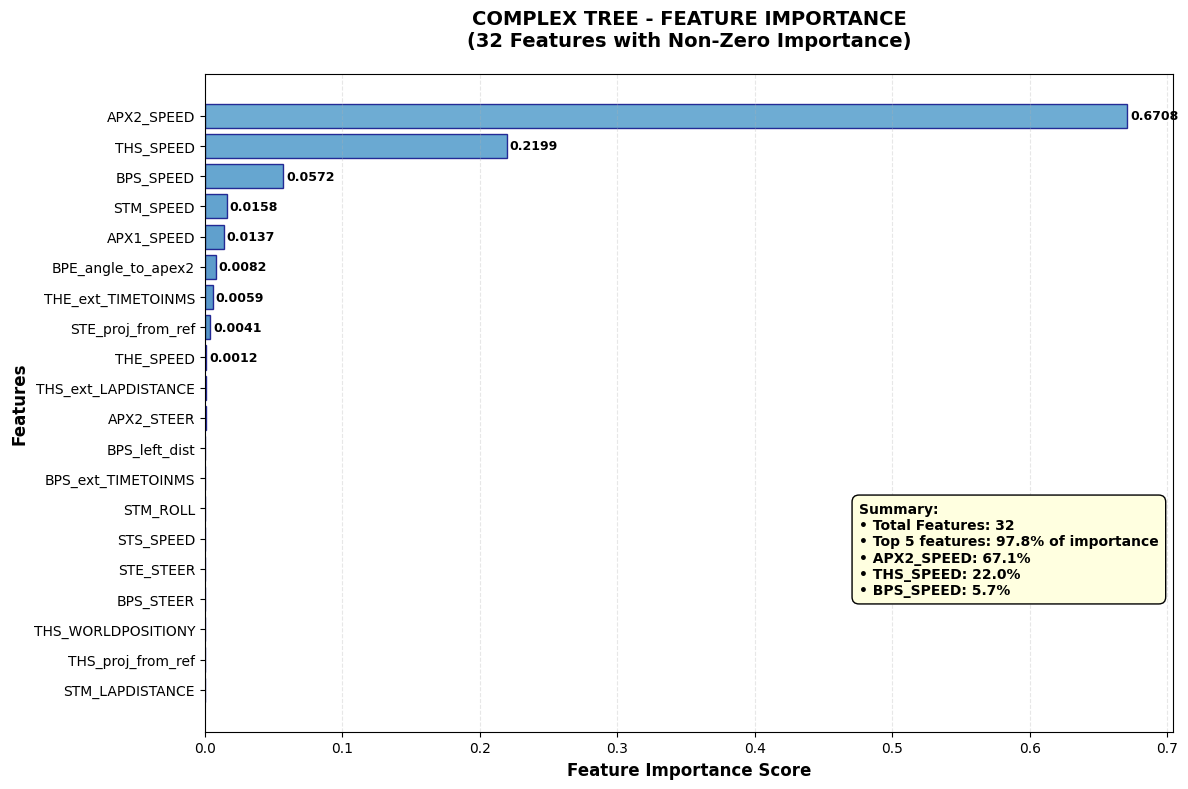

In [38]:
# Creating the graph
plt.figure(figsize=(12, 8))

# Color gradient
colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(complex_df)))

bars = plt.barh(complex_df['feature'], complex_df['importance'],
                color=colors, edgecolor='navy', alpha=0.8)

# Add value labels on bars (only show for significant values)
for bar in bars:
    width = bar.get_width()
    if width > 0.001:  # Only label bars with importance > 0.001
        plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
                 f'{width:.4f}', ha='left', va='center',
                 fontweight='bold', fontsize=9)

# Customize the graph
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('COMPLEX TREE - FEATURE IMPORTANCE\n(32 Features with Non-Zero Importance)',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add summary statistics
total_importance = complex_df['importance'].sum()
top_5_total = complex_df.head(5)['importance'].sum()

plt.figtext(0.72, 0.25,
            f'''Summary:
• Total Features: 32
• Top 5 features: {top_5_total/total_importance*100:.1f}% of importance
• APX2_SPEED: {complex_df.iloc[0]['importance']/total_importance*100:.1f}%
• THS_SPEED: {complex_df.iloc[1]['importance']/total_importance*100:.1f}%
• BPS_SPEED: {complex_df.iloc[2]['importance']/total_importance*100:.1f}%''',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"),
            fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [39]:
# Print comparison with original tree
print("=== COMPARISON WITH ORIGINAL TREE ===")
print(f"Original Tree: 7 features with importance > 0")
print(f"Complex Tree:  32 features with importance > 0")
print(f"Improvement:   +25 features discovered!")
print(f"\nNew important features found:")
new_features = ['THS_SPEED', 'BPE_angle_to_apex2', 'THE_ext_TIMETOINMS', 'STE_proj_from_ref', 'APX2_STEER']
for feature in new_features:
    if feature in complex_df['feature'].values:
        imp = complex_df[complex_df['feature'] == feature]['importance'].values[0]
        print(f"  - {feature}: {imp:.4f}")

=== COMPARISON WITH ORIGINAL TREE ===
Original Tree: 7 features with importance > 0
Complex Tree:  32 features with importance > 0
Improvement:   +25 features discovered!

New important features found:
  - THS_SPEED: 0.2199
  - BPE_angle_to_apex2: 0.0082
  - THE_ext_TIMETOINMS: 0.0059
  - STE_proj_from_ref: 0.0041
  - APX2_STEER: 0.0007


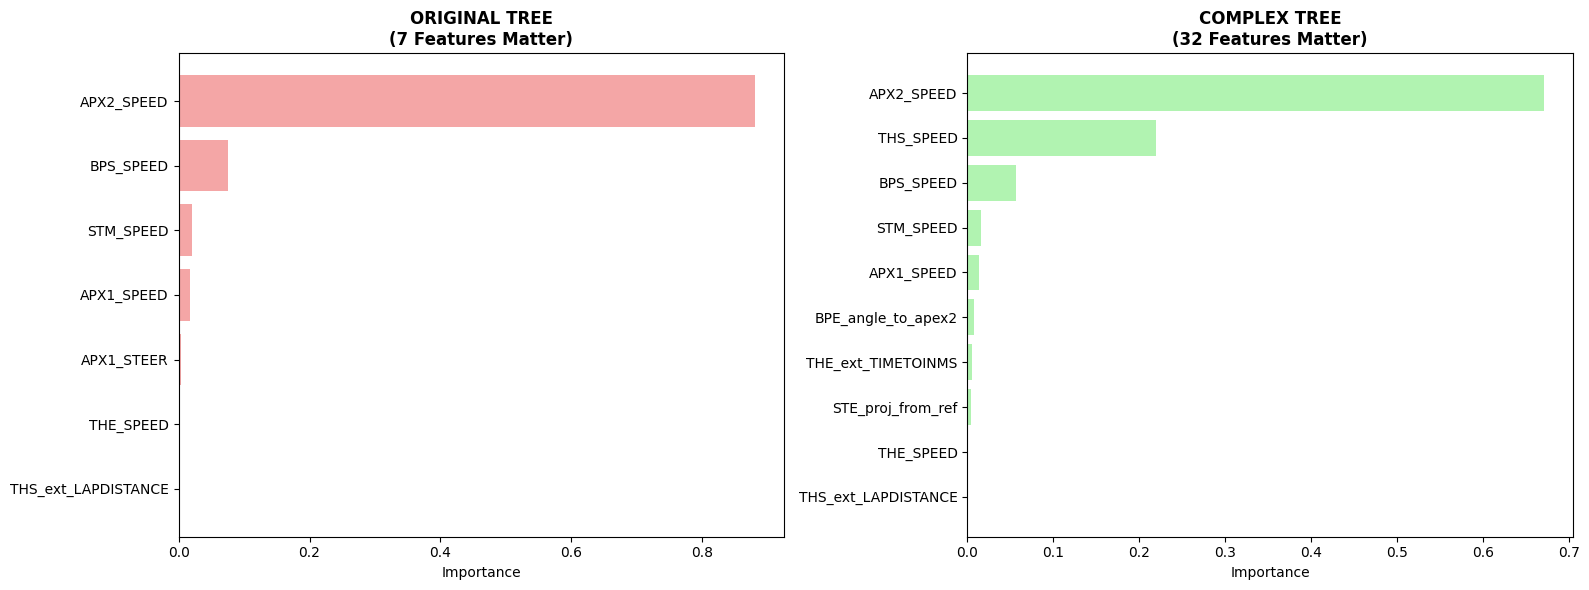

In [40]:
# Compare original vs complex tree for top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original Tree (top 7)
original_top = ['APX2_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED', 'APX1_STEER', 'THE_SPEED', 'THS_ext_LAPDISTANCE']
original_imp = [0.880578, 0.075210, 0.020839, 0.016919, 0.003906, 0.001571, 0.000977]

ax1.barh(original_top, original_imp, color='lightcoral', alpha=0.7)
ax1.set_xlabel('Importance')
ax1.set_title('ORIGINAL TREE\n(7 Features Matter)', fontweight='bold')
ax1.invert_yaxis()

# Complex Tree (top 10)
complex_top = complex_df.head(10)['feature'].tolist()
complex_imp = complex_df.head(10)['importance'].tolist()

ax2.barh(complex_top, complex_imp, color='lightgreen', alpha=0.7)
ax2.set_xlabel('Importance')
ax2.set_title('COMPLEX TREE\n(32 Features Matter)', fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [41]:
# === SUMMARY ===
print("\n" + "="*50)
print("SUMMARY COMPARISON")
print("="*50)
print(f"Total features analyzed: {X.shape[1]}")
print(f"Original Tree - Useful features: {non_zero_orig}")
print(f"Complex Tree - Useful features: {non_zero_comp}")
print(f"Improvement: +{non_zero_comp - non_zero_orig} features discovered")

print(f"\nPERFORMANCE COMPARISON:")
print("=" * 40)
print(f"{'Metric':<15} {'Original Tree':<15} {'Complex Tree':<15}")
print("=" * 40)
print(f"{'Test RMSE':<15} {test_rmse_orig:<15.2f} {test_rmse_comp:<15.2f}")
print(f"{'Test R²':<15} {test_r2_orig:<15.4f} {test_r2_comp:<15.4f}")
print(f"{'Train R²':<15} {train_r2_orig:<15.4f} {train_r2_comp:<15.4f}")
print("=" * 40)

# Determine which model is better
if test_r2_comp > test_r2_orig:
    print(f"🎯 COMPLEX TREE WINS: Better R² score (+{test_r2_comp - test_r2_orig:.4f})")
else:
    print(f"🎯 ORIGINAL TREE WINS: Better R² score")


SUMMARY COMPARISON
Total features analyzed: 174
Original Tree - Useful features: 7
Complex Tree - Useful features: 32
Improvement: +25 features discovered

PERFORMANCE COMPARISON:
Metric          Original Tree   Complex Tree   
Test RMSE       992.44          679.19         
Test R²         -0.0259         0.5195         
Train R²        0.4166          0.5481         
🎯 COMPLEX TREE WINS: Better R² score (+0.5454)


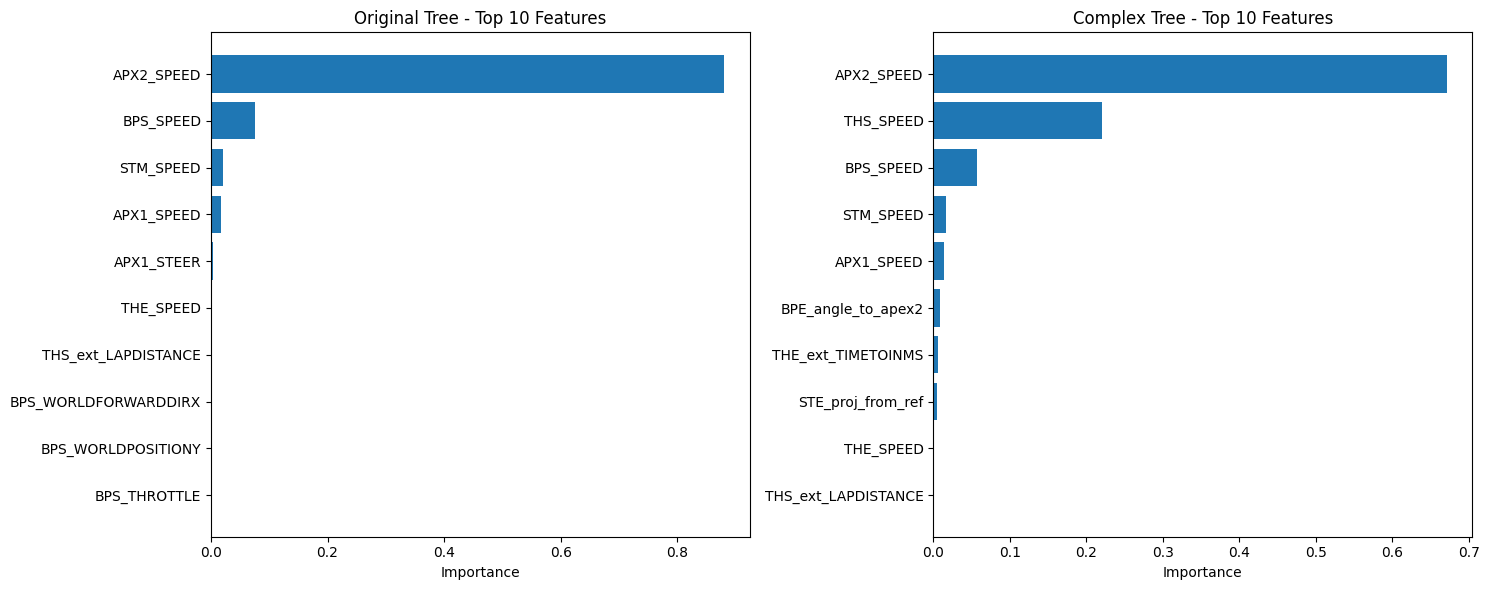

In [42]:
# === VISUALIZATION ===
plt.figure(figsize=(15, 6))

# Plot 1: Original Tree
plt.subplot(1, 2, 1)
top_orig = importance_df_orig.head(10)
plt.barh(top_orig['feature'], top_orig['importance'])
plt.xlabel('Importance')
plt.title('Original Tree - Top 10 Features')
plt.gca().invert_yaxis()

# Plot 2: Complex Tree
plt.subplot(1, 2, 2)
top_comp = importance_df_comp.head(10)
plt.barh(top_comp['feature'], top_comp['importance'])
plt.xlabel('Importance')
plt.title('Complex Tree - Top 10 Features')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [43]:
# === SECTION 6: SELECTED FEATURES ANALYSIS ===
print("\n" + "="*60)
print("ANALYZING SELECTED FEATURES SUBSET")
print("="*60)

# Your selected features
selected_features = [
    "APX1_BRAKE", "APX1_SPEED", "APX1_STEER", "APX1_WORLDFORWARDDIRX",
    "APX1_YAW", "APX1_angle_to_apex2", "APX1_proj_from_ref", "APX2_SPEED",
    "APX2_STEER", "APX2_THROTTLE", "APX2_WORLDPOSITIONY", "APX2_angle_to_apex1",
    "APX2_angle_to_apex2", "APX2_dist_apex_1", "BPE_ROLL", "BPE_STEER",
    "BPE_WORLDFORWARDDIRY", "BPE_YAW", "BPE_angle_to_apex1", "BPE_angle_to_apex2",
    "BPE_ext_TIMETOINMS", "BPE_left_dist", "BPE_proj_from_ref", "BPS_PITCH",
    "BPS_ROLL", "BPS_STEER", "BPS_THROTTLE", "BPS_YAW",
    "BPS_angle_to_apex1", "BPS_ext_TIMETOINMS", "STE_ROLL", "STE_STEER",
    "STE_THROTTLE", "STE_angle_to_apex1", "STE_ext_LAPDISTANCE", "STE_ext_TIMETOINMS",
    "STE_proj_from_ref", "STM_BRAKE", "STM_ROLL", "STM_SPEED",
    "STM_STEER", "STM_WORLDFORWARDDIRY", "STM_YAW", "STM_angle_to_apex1",
    "STM_angle_to_apex2", "STM_left_dist", "STS_BRAKE", "STS_STEER",
    "STS_THROTTLE", "STS_angle_to_apex1", "STS_angle_to_apex2", "STS_ext_TIMETOINMS",
    "STS_proj_from_ref", "THE_BRAKE", "THE_ROLL", "THE_SPEED",
    "THE_WORLDFORWARDDIRX", "THE_YAW", "THE_dist_apex_1", "THE_proj_from_ref",
    "THS_ROLL", "THS_STEER", "THS_THROTTLE", "THS_YAW",
    "THS_proj_from_ref"
]

print(f"Selected features count: {len(selected_features)}")



ANALYZING SELECTED FEATURES SUBSET
Selected features count: 65


In [44]:
# Filter the dataset to only use selected features
X_selected = X[selected_features]

# Split the data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train_sel.shape}")
print(f"Testing set:  {X_test_sel.shape}")

Training set: (250, 65)
Testing set:  (63, 65)


In [45]:
# === DECISION TREE ON SELECTED FEATURES ===
print("\n=== TRAINING DECISION TREE ON SELECTED FEATURES ===")

dt_selected = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_selected.fit(X_train_sel, y_train_sel)



=== TRAINING DECISION TREE ON SELECTED FEATURES ===


DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [46]:
# === PERFORMANCE ON SELECTED FEATURES ===
y_train_pred_sel = dt_selected.predict(X_train_sel)
y_test_pred_sel = dt_selected.predict(X_test_sel)

train_rmse_sel = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_sel))
test_rmse_sel = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_sel))

print("SELECTED FEATURES PERFORMANCE:")
print(f"Training RMSE: {train_rmse_sel:.2f} ms")
print(f"Testing RMSE:  {test_rmse_sel:.2f} ms")
print(f"Error %: {test_rmse_sel / y.mean() * 100:.2f}%")

SELECTED FEATURES PERFORMANCE:
Training RMSE: 2151.76 ms
Testing RMSE:  708.54 ms
Error %: 5.28%


In [47]:
# === INFORMATION GAIN ON SELECTED FEATURES ===
feature_importances_sel = dt_selected.feature_importances_
importance_df_sel = pd.DataFrame({
    'feature': X_selected.columns,
    'importance': feature_importances_sel
}).sort_values('importance', ascending=False)

print("\n=== SELECTED FEATURES - TOP 25 BY INFORMATION GAIN ===")
print(importance_df_sel.head(25))

non_zero_sel = (importance_df_sel['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_sel} out of {len(selected_features)}")



=== SELECTED FEATURES - TOP 25 BY INFORMATION GAIN ===
                 feature  importance
7             APX2_SPEED    0.683249
61             THS_STEER    0.214565
39             STM_SPEED    0.054629
30              STE_ROLL    0.018646
32          STE_THROTTLE    0.013942
41  STM_WORLDFORWARDDIRY    0.006518
14              BPE_ROLL    0.002205
1             APX1_SPEED    0.002197
49    STS_angle_to_apex1    0.000961
47             STS_STEER    0.000861
17               BPE_YAW    0.000581
40             STM_STEER    0.000544
28    BPS_angle_to_apex1    0.000259
20    BPE_ext_TIMETOINMS    0.000223
51    STS_ext_TIMETOINMS    0.000140
62          THS_THROTTLE    0.000124
57               THE_YAW    0.000102
58       THE_dist_apex_1    0.000095
64     THS_proj_from_ref    0.000039
54              THE_ROLL    0.000038
46             STS_BRAKE    0.000035
63               THS_YAW    0.000033
34   STE_ext_LAPDISTANCE    0.000014
0             APX1_BRAKE    0.000000
16  BPE_WORLDFORWAR

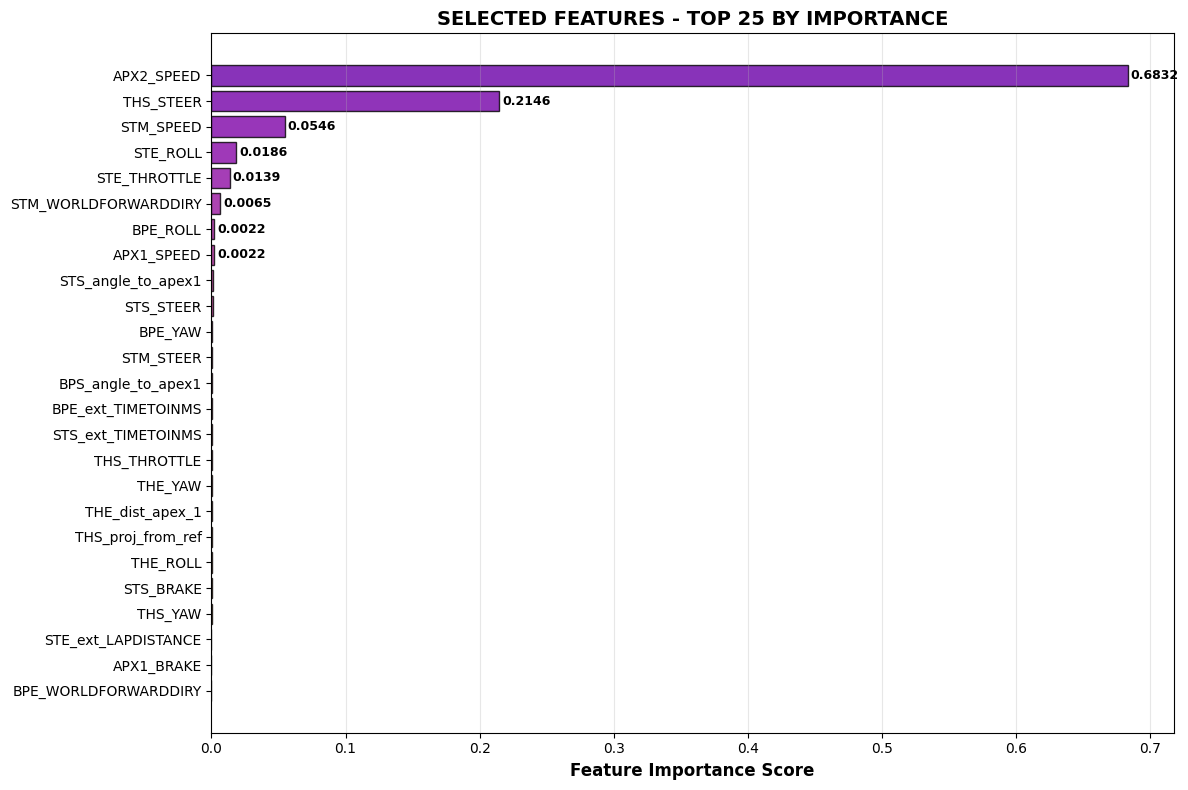

In [48]:
# === VISUALIZATION ===
plt.figure(figsize=(12, 8))
top_sel = importance_df_sel.head(25)

bars = plt.barh(top_sel['feature'], top_sel['importance'],
                color=plt.cm.plasma(np.linspace(0.2, 0.8, len(top_sel))),
                edgecolor='black', alpha=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    if width > 0.001:
        plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
                 f'{width:.4f}', ha='left', va='center',
                 fontweight='bold', fontsize=9)

plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.title('SELECTED FEATURES - TOP 25 BY IMPORTANCE', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
# === COMPARISON WITH PREVIOUS MODELS ===
print("\n" + "="*50)
print("PERFORMANCE COMPARISON ACROSS ALL MODELS")
print("="*50)
print(f"Original Tree (all features):    {test_rmse_orig:.2f} ms")
print(f"Complex Tree (all features):     {test_rmse_comp:.2f} ms")
print(f"Selected Features Tree:          {test_rmse_sel:.2f} ms")
print(f"\nFeature Count Comparison:")
print(f"Original Tree: {X.shape[1]} features -> {non_zero_orig} useful")
print(f"Complex Tree:  {X.shape[1]} features -> {non_zero_comp} useful")
print(f"Selected Tree: {len(selected_features)} features -> {non_zero_sel} useful")


PERFORMANCE COMPARISON ACROSS ALL MODELS
Original Tree (all features):    992.44 ms
Complex Tree (all features):     679.19 ms
Selected Features Tree:          708.54 ms

Feature Count Comparison:
Original Tree: 174 features -> 7 useful
Complex Tree:  174 features -> 32 useful
Selected Tree: 65 features -> 23 useful
